In [1]:
import json
import sys
import music21
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from music21 import *

from collections import Counter

In [2]:
with open('./Data/data.json') as f:
    data = json.load(f)

df = pd.json_normalize(data)

## Nombre de partitions par time_signature

In [3]:
count_by_key = df[df['time_signature'].notnull()]['time_signature'].value_counts()
sorted_keys = count_by_key.sort_values(ascending=False).index

print(count_by_key)

2/4    162
3/4      5
4/4      4
Name: time_signature, dtype: int64


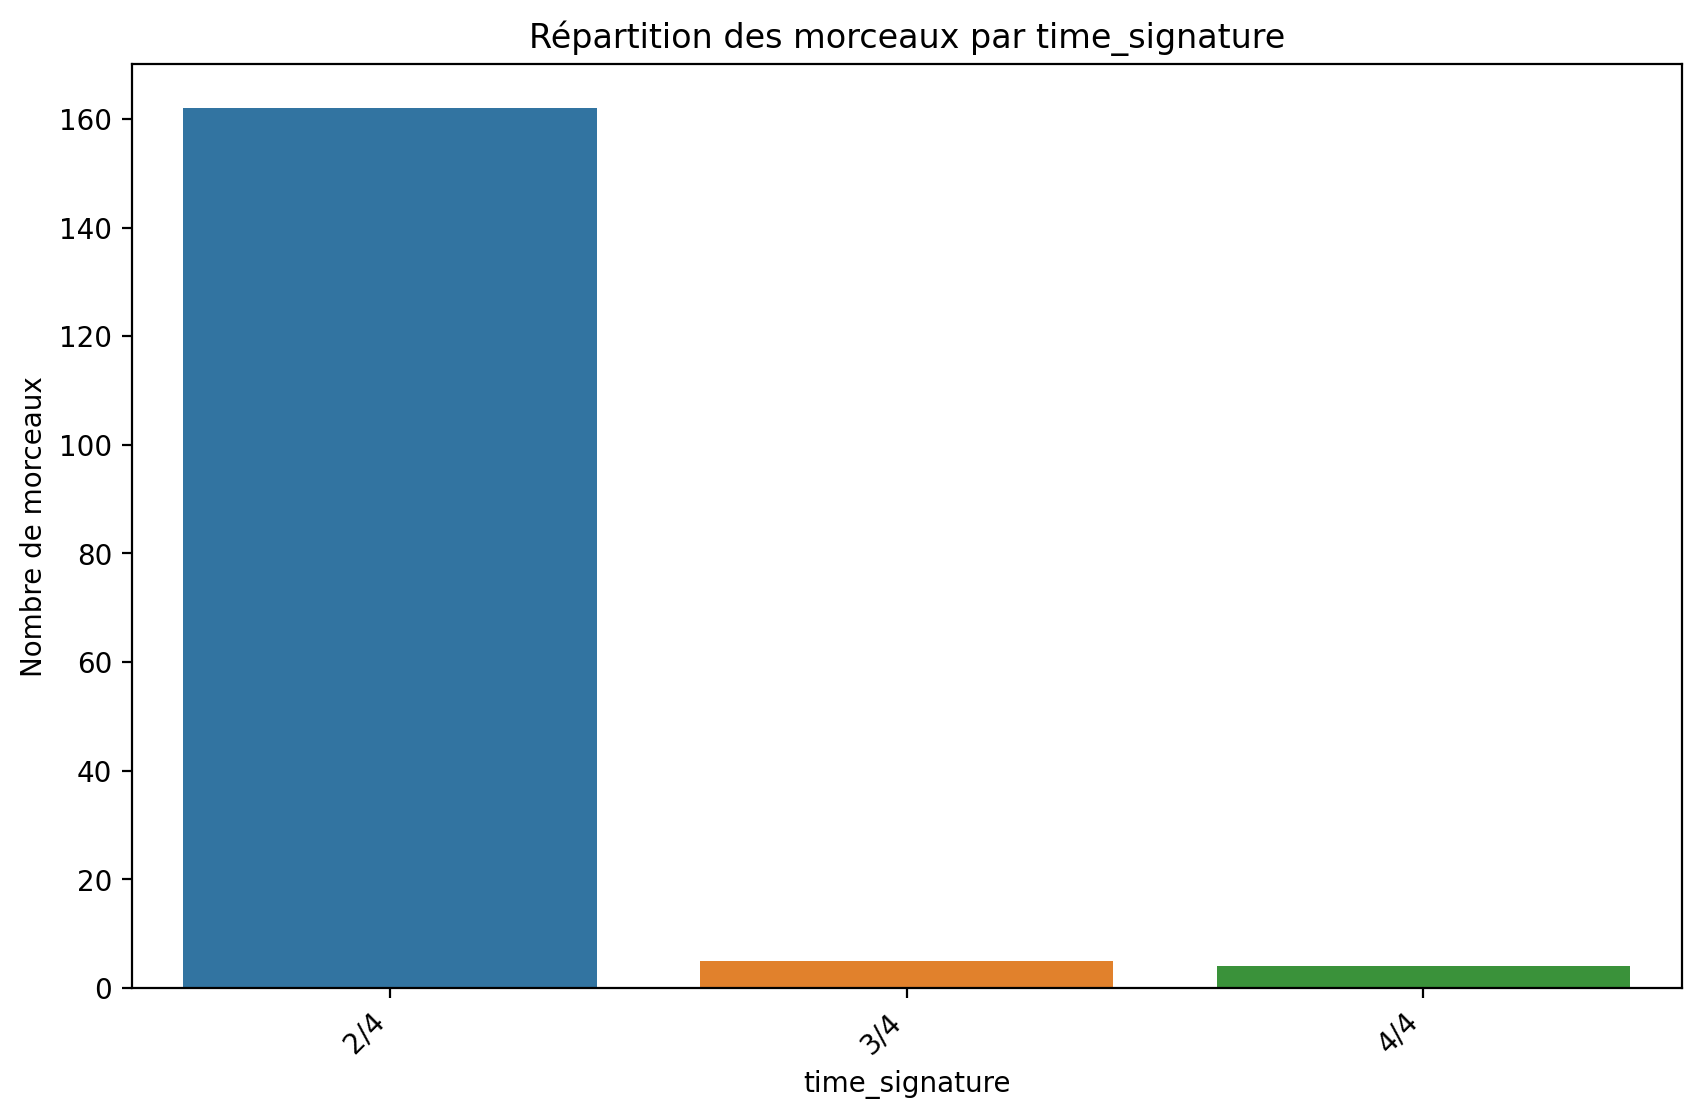

In [4]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='time_signature', data=df[df['time_signature'].notnull()], order=sorted_keys)
plt.title('Répartition des morceaux par time_signature')
plt.xlabel('time_signature')
plt.ylabel('Nombre de morceaux')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

## Nombre de morceaux par clé

## Par partie 

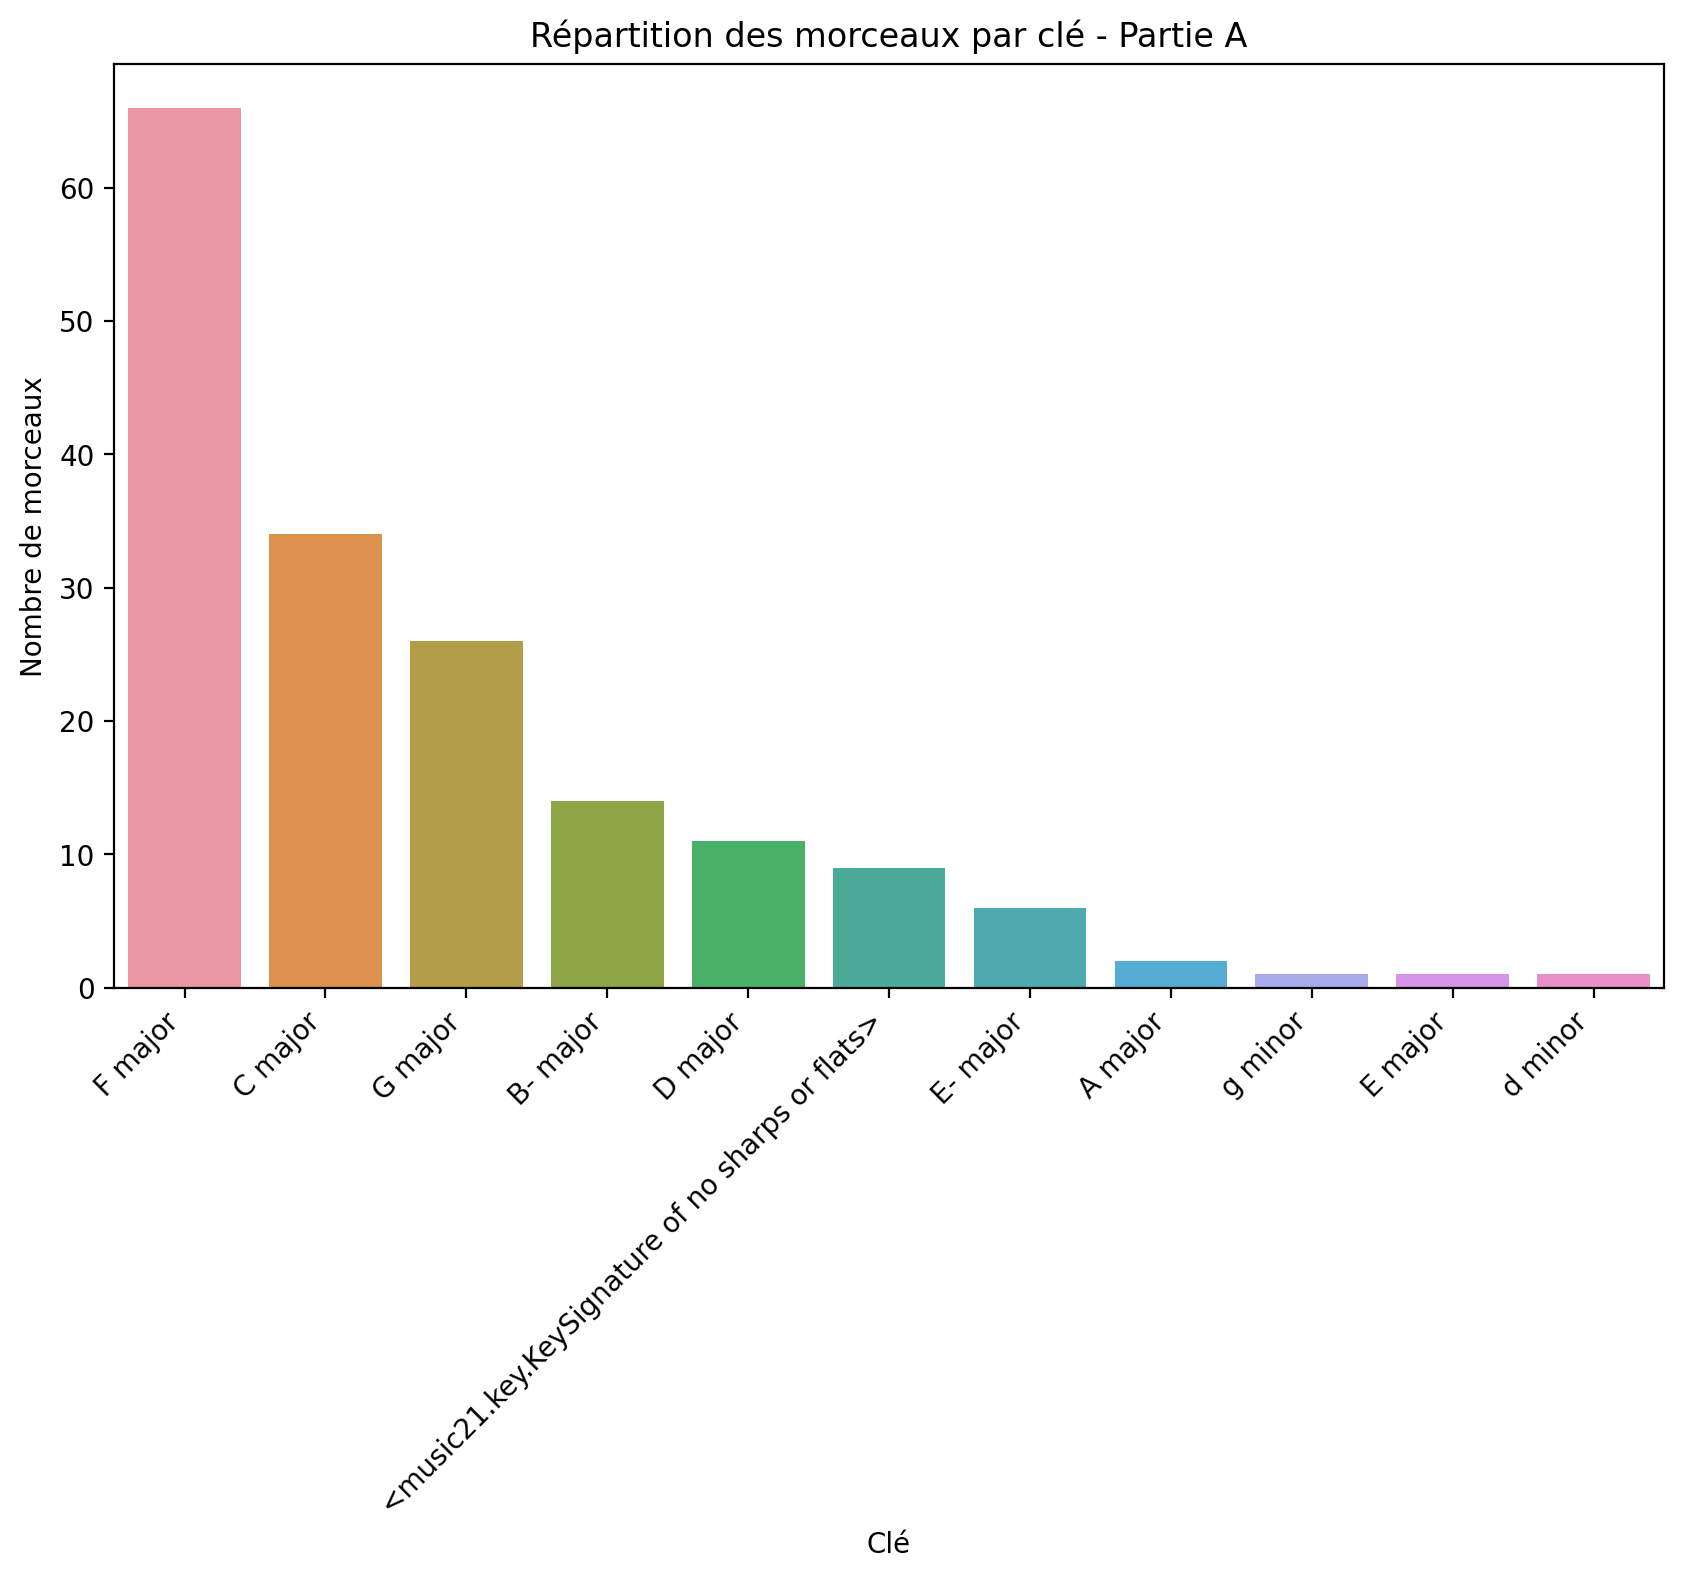

In [6]:
count_by_key = df[df['A.key'].notnull()]['A.key'].value_counts()
sorted_keys = count_by_key.sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='A.key', data=df[df['A.key'].notnull()], order=sorted_keys)
plt.title('Répartition des morceaux par clé - Partie A')
plt.xlabel('Clé')
plt.ylabel('Nombre de morceaux')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

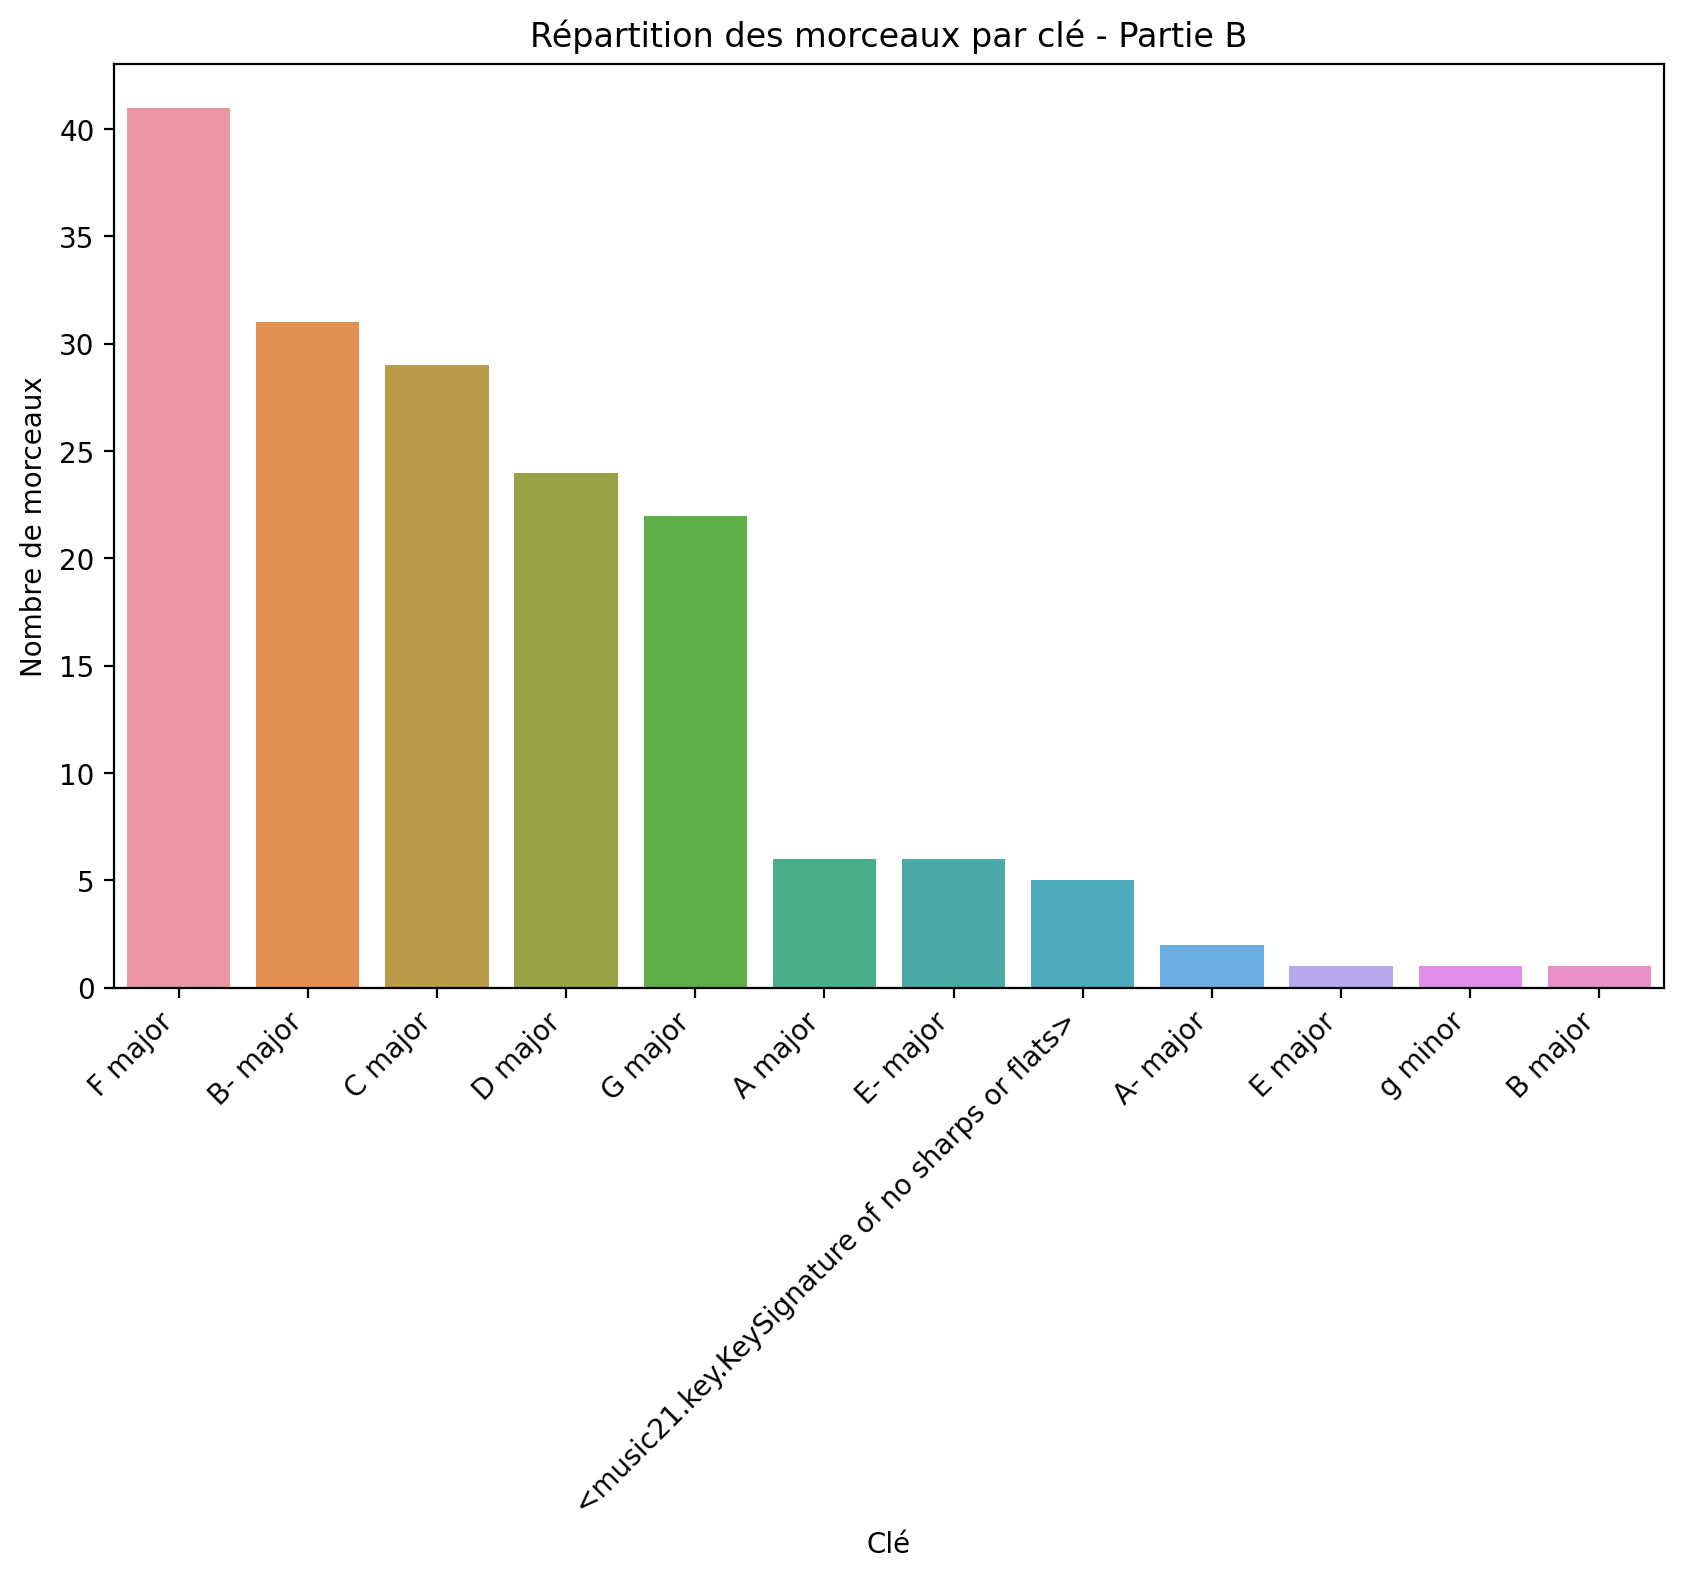

In [7]:
count_by_key = df[df['B.key'].notnull()]['B.key'].value_counts()
sorted_keys = count_by_key.sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='B.key', data=df[df['B.key'].notnull()], order=sorted_keys)
plt.title('Répartition des morceaux par clé - Partie B')
plt.xlabel('Clé')
plt.ylabel('Nombre de morceaux')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

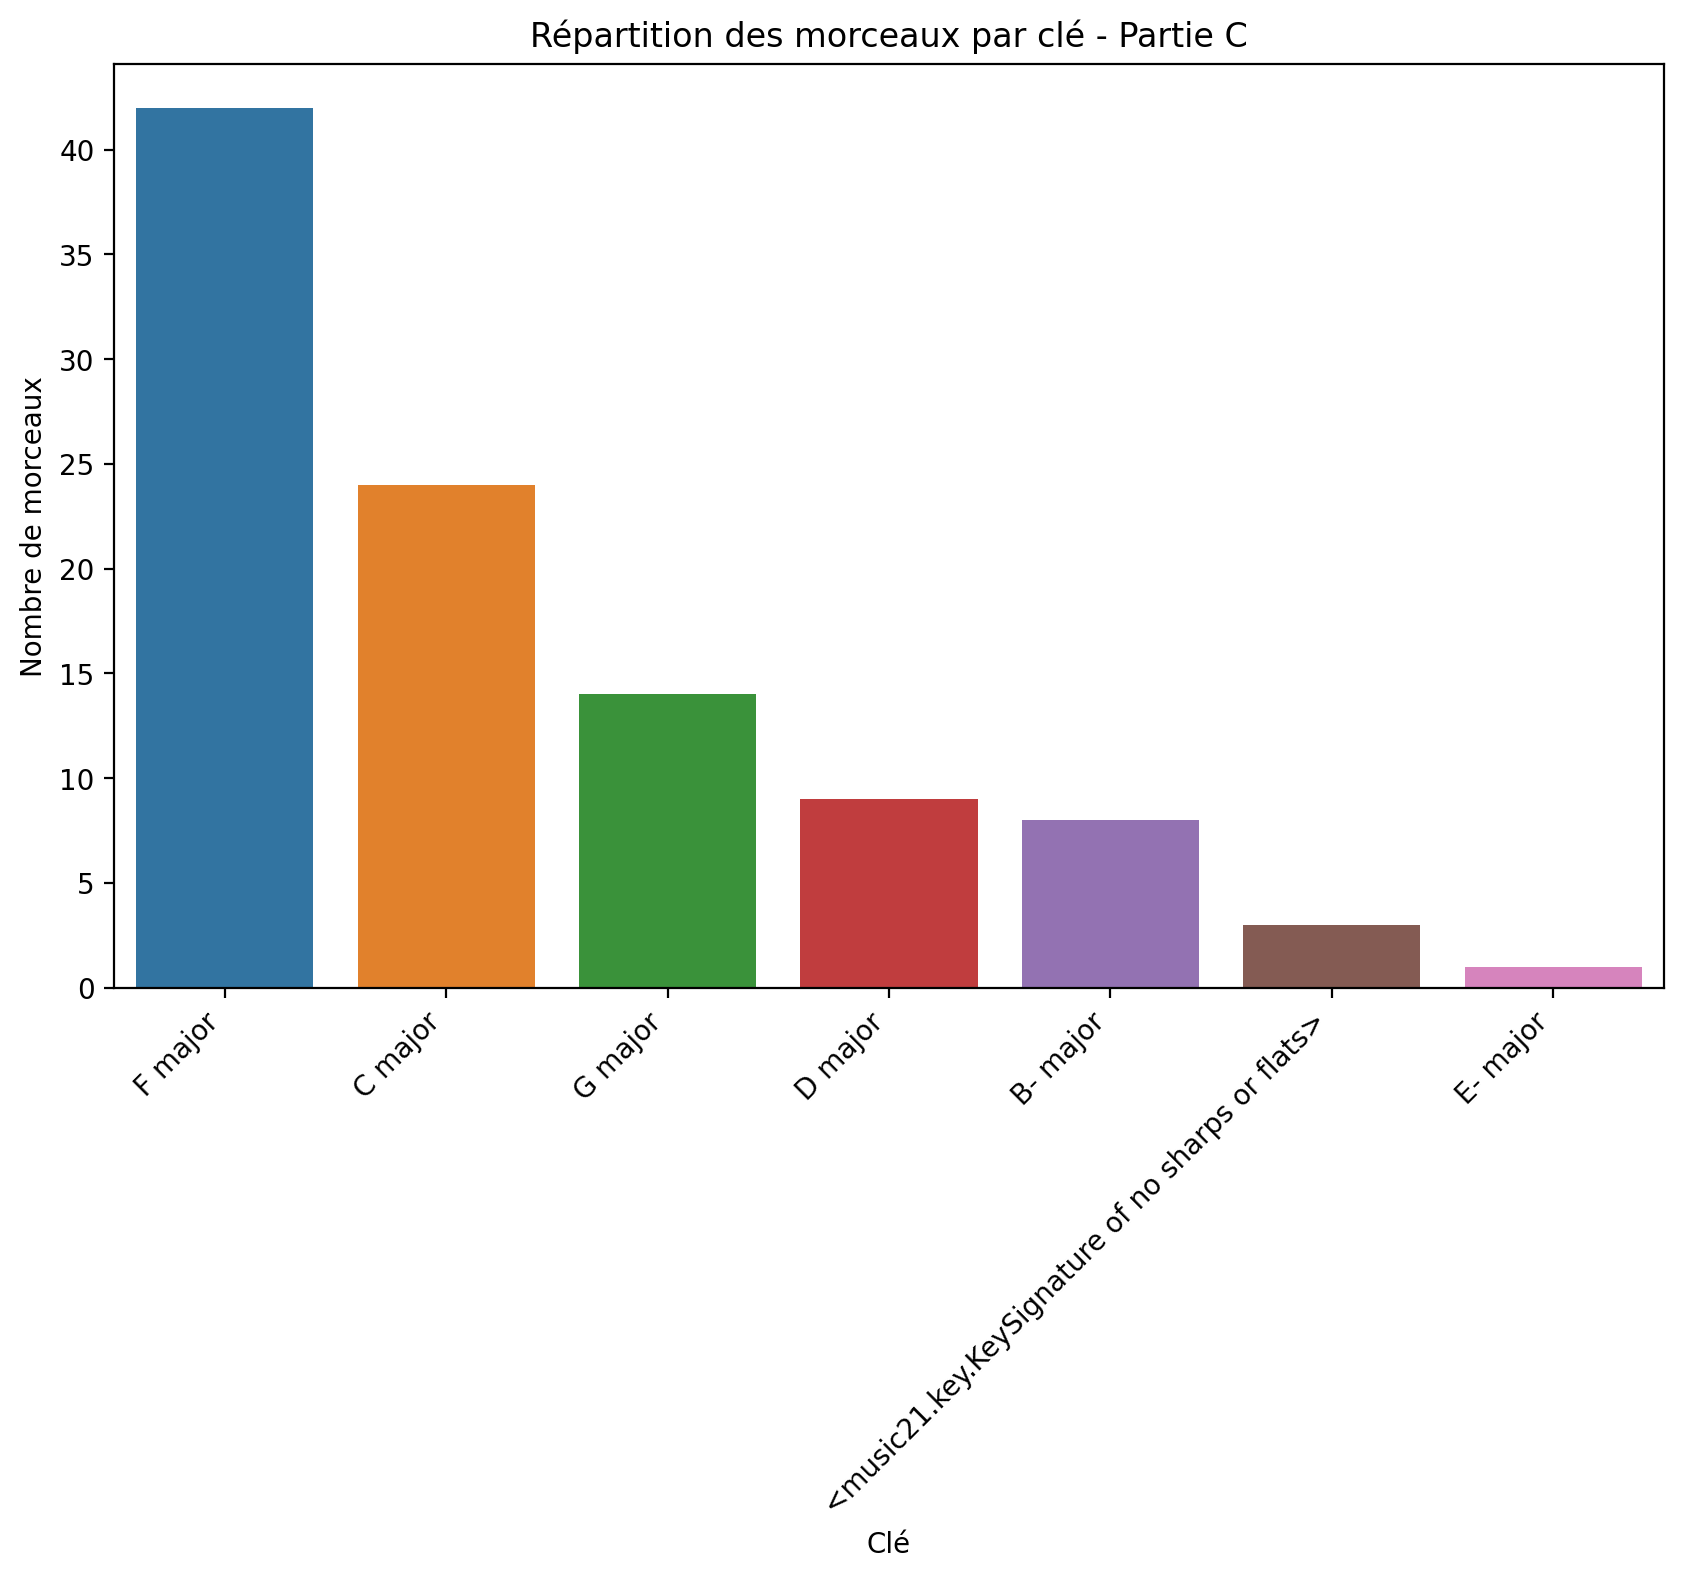

In [8]:
count_by_key = df[df['C.key'].notnull()]['C.key'].value_counts()
sorted_keys = count_by_key.sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='C.key', data=df[df['C.key'].notnull()], order=sorted_keys)
plt.title('Répartition des morceaux par clé - Partie C')
plt.xlabel('Clé')
plt.ylabel('Nombre de morceaux')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

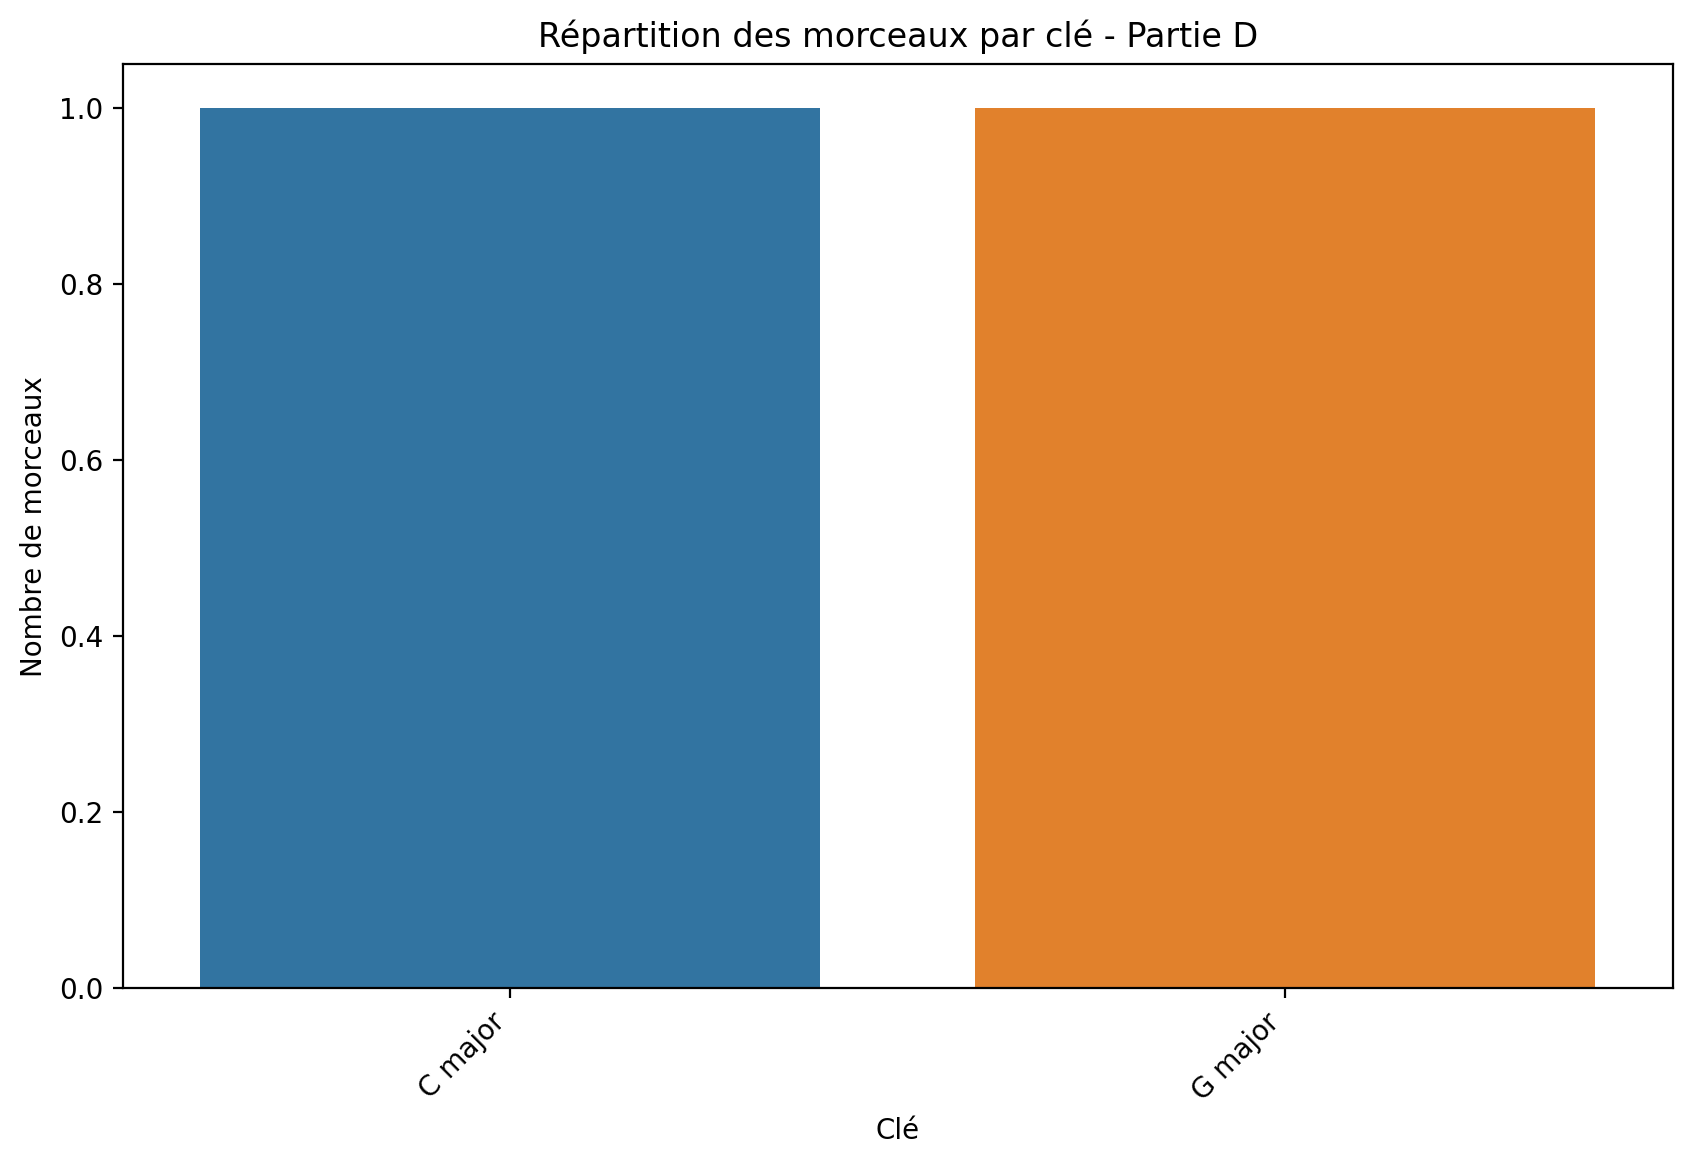

In [9]:
count_by_key = df[df['D.key'].notnull()]['D.key'].value_counts()
sorted_keys = count_by_key.sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='D.key', data=df[df['D.key'].notnull()], order=sorted_keys)
plt.title('Répartition des morceaux par clé - Partie D')
plt.xlabel('Clé')
plt.ylabel('Nombre de morceaux')

# Incliner les étiquettes de l'axe des x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

## Vérification des longueurs des parties extraites

In [10]:
df

title time_signature  \
0        A Ginga do Mané            2/4   
1     A Vida é um Buraco            2/4   
2            ACARICIANDO            2/4   
3         ACERTA O PASSO            4/4   
4    Aeroporto do Galeao            2/4   
..                   ...            ...   
166  Viva João da Baiana            2/4   
167          Vou Vivendo            2/4   
168         VÊ SE GOSTAS            2/4   
169         É DO PANGARÉ            2/4   
170          É DO QUE HÁ            2/4   

                                                A.key  \
0                                             F major   
1                                             C major   
2                                             F major   
3                                             C major   
4                                             F major   
..                                                ...   
166                                          B- major   
167                                           F major   
168                                           G major   
169                                           F major   
170  <music21.key.KeySignature of no sharps or flats>   

                                             A.1.Notes  \
0    [[E6, 16th], [G5, 16th], [G#5, 16th], [A5, 16t...   
1     [[E5, 16th], [D5, 16th], [C5, 16th], [B4, 16th]]   
2    [[A4, 16th], [C5, eighth], [D5, 16th], [D5, 16...   
3    [[rest, 16th], [E4, 16th], [G4, 16th], [C5, 16...   
4    [[G4, eighth], [A4, 16th], [C5, 16th], [F4, 16...   
..                                                 ...   
166  [[rest, 16th], [D5, 16th], [B-4, 16th], [G4, 1...   
167                                                 []   
168                                       [[E4, half]]   
169  [[D4, 16th], [E4, 16th], [F4, 16th], [G4, 16th...   
170                                       [[E5, half]]   

                  A.1.Accords              A.1.Expressions  \
0                          []                 [[Gm6, 1.5]]   
1                          []                           []   
2                          []                 [[F6, 1.75]]   
3    [[C, 1.0], [E-dim, 0.5]]  [[Choro AA BB A CC A, 1.5]]   
4           [[F6 add 9, 2.0]]                           []   
..                        ...                          ...   
166               [[Gm, 1.5]]                           []   
167           [[F#dim, 2.25]]                   [[F, 3.0]]   
168               [[G6, 2.0]]                           []   
169               [[Dm, 0.5]]                           []   
170               [[Am, 2.0]]                           []   

                                             A.2.Notes  \
0    [[E6, 16th], [D6, 16th], [F5, 16th], [G5, 16th...   
1    [[A4, 16th], [B4, 16th], [C5, 16th], [C#5, 16t...   
2    [[G#4, quarter], [G#4, 16th], [D5, eighth], [D...   
3    [[B4, 16th], [A4, eighth], [B4, 16th], [G4, ei...   
4    [[rest, 16th], [F4, 16th], [G4, 16th], [A4, 16...   
..                                                 ...   
166  [[rest, 16th], [C5, 16th], [A4, 16th], [F#4, 1...   
167  [[A4, 16th], [G4, eighth], [F#4, 16th], [G4, e...   
168  [[rest, 16th], [D4, 16th], [E4, 16th], [D4, 16...   
169  [[G4, 16th], [A4, 16th], [B-4, 16th], [C5, 16t...   
170  [[E5, 16th], [E5, eighth], [D#5, 16th], [E5, 1...   

                      A.2.Accords          A.2.Expressions  \
0                              []           [[Dm/F, 1.75]]   
1         [[Dm7, 1.0], [G7, 1.0]]                       []   
2                              []            [[C7#5, 2.0]]   
3         [[Dm7, 1.0], [G7, 1.0]]  [[Acerta o Passo, 0.5]]   
4              [[F6 add 9, 1.75]]                       []   
..                            ...                      ...   
166                  [[D7, 1.75]]                       []   
167                            []   [[Gm, 1.0], [Gm, 1.0]]   
168                            []                       []   
169                   [[Gm, 2.0]]                       []

In [12]:
def count_subparts(song, part):
    subparts = [subpart for subpart in song[part].keys() if subpart != 'key']
    return len(subparts)


counts_dict = {'titre': [song['title'] for song in data]}
for part in ['A', 'B', 'C', 'D']:  
    counts_dict[f'cpt_part_{part}'] = [count_subparts(song, part) if part in song else 0 for song in data]


df_counts = pd.DataFrame(counts_dict)

print(df_counts[df_counts["cpt_part_B"]==0])


              titre  cpt_part_A  cpt_part_B  cpt_part_C  cpt_part_D
18        ASSANHADO           8           0           0           0
97       Machucando           0           0          16           0
114           O OVO          17           0           0           0
130       Samambaia           0           0           0           0
163  URUBU MALANDRO          27           0           0           0


## Notes

### Sur une mesure en particulier

In [13]:
def count_notes(note_list):
    return dict(Counter(note[0] for note in note_list))

df['Note_Count_A'] = df['A.1.Notes'].apply(lambda x: count_notes(x) if isinstance(x, list) else {})
df['Note_Count_B'] = df['B.1.Notes'].apply(lambda x: count_notes(x) if isinstance(x, list) else {})

note_counts_A = pd.DataFrame(df['Note_Count_A'].tolist()).fillna(0)
note_counts_B = pd.DataFrame(df['Note_Count_B'].tolist()).fillna(0)

note_counts_A_sum = note_counts_A.sum()
note_counts_B_sum = note_counts_B.sum()



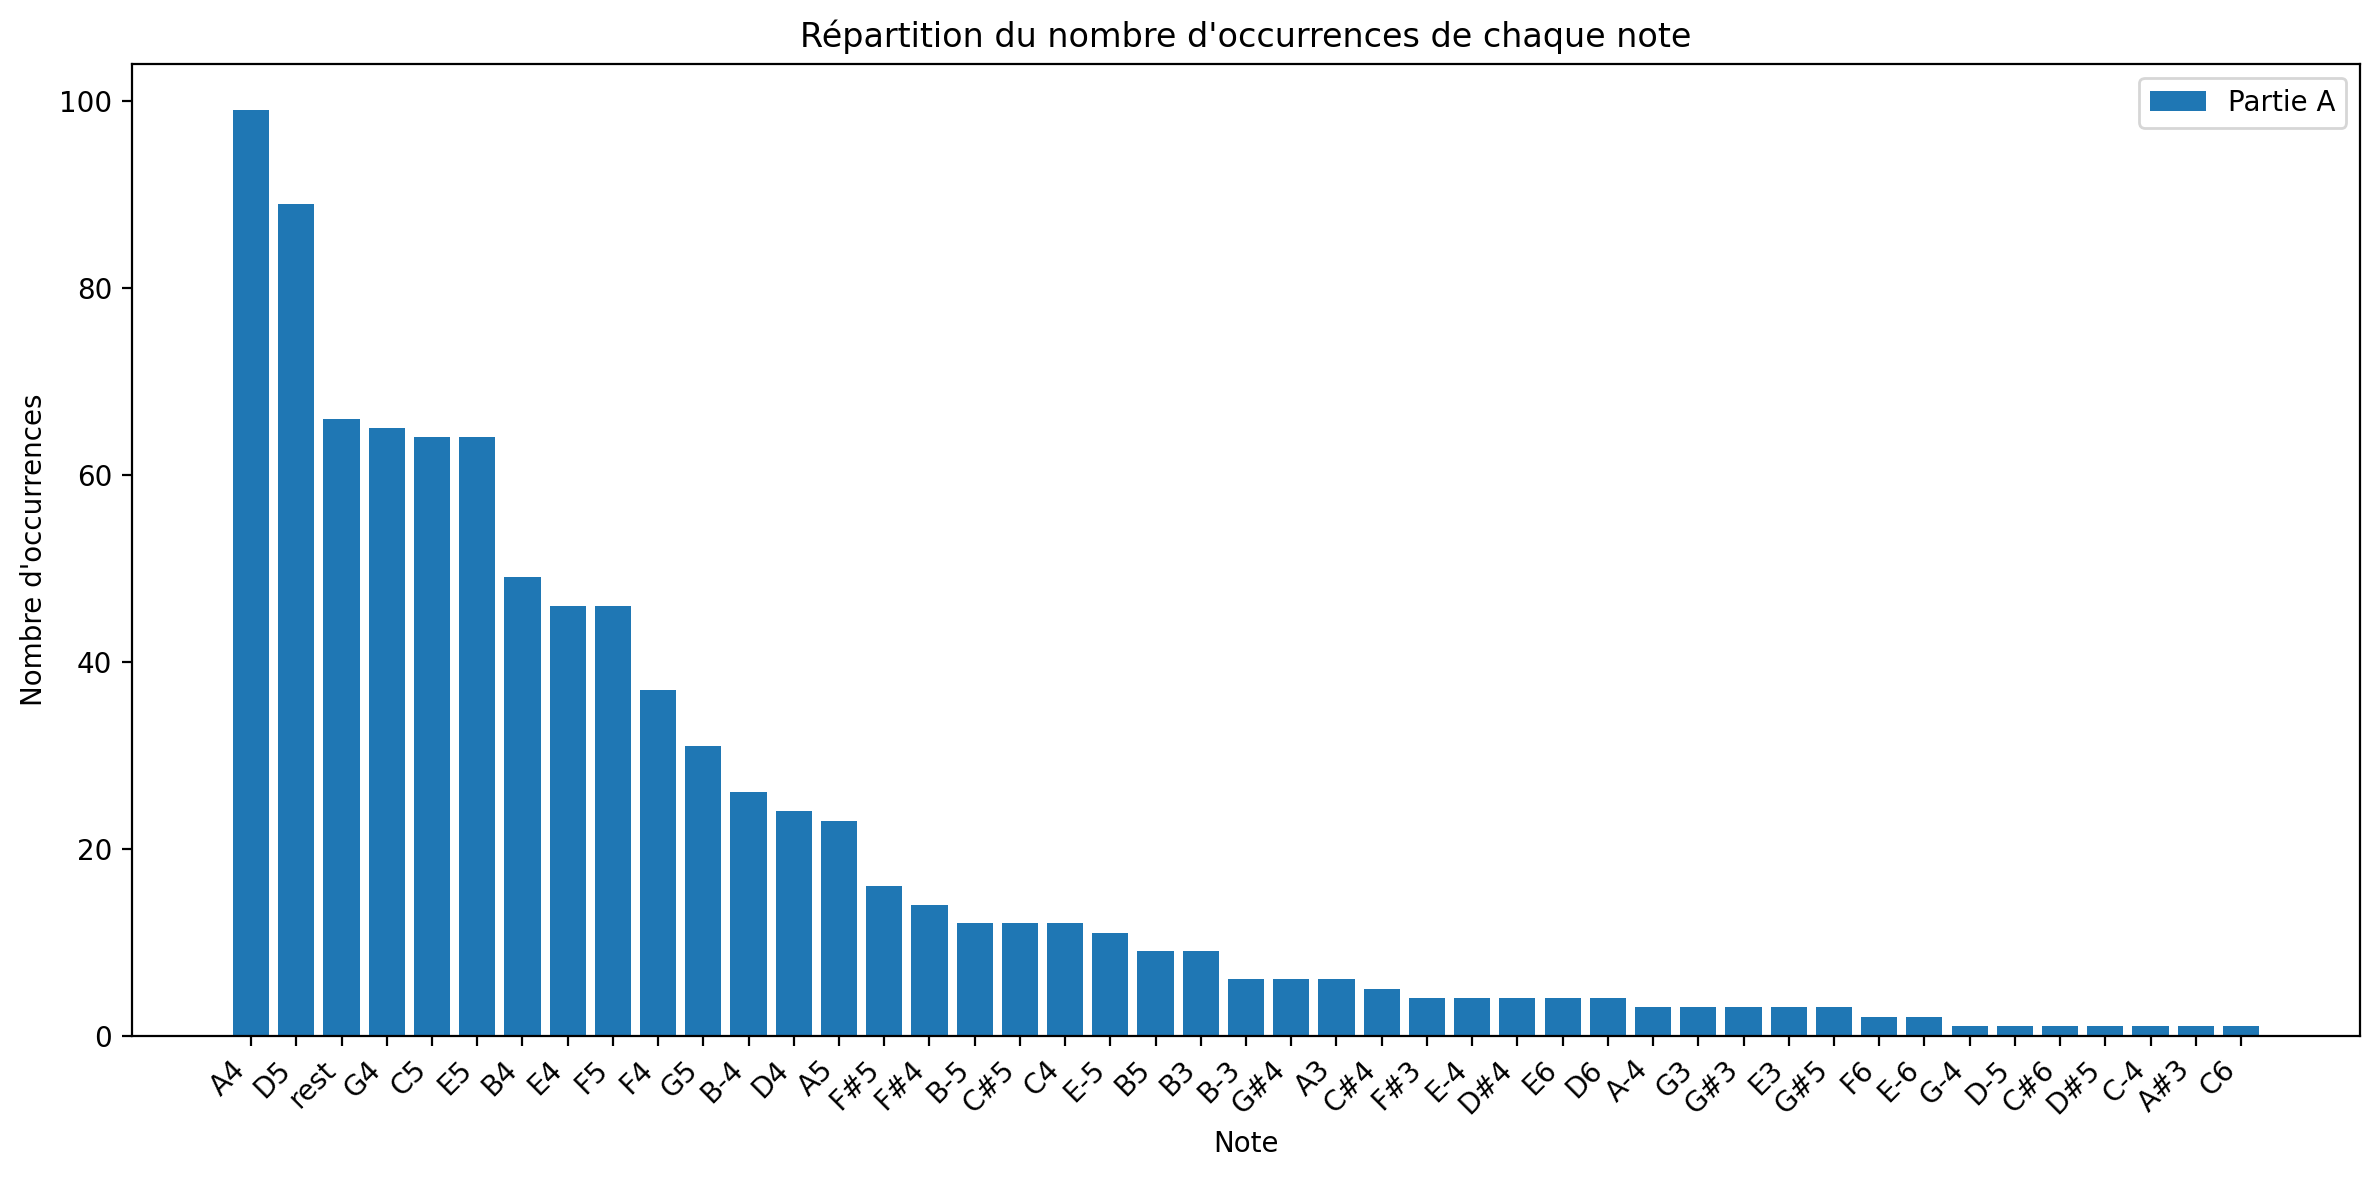

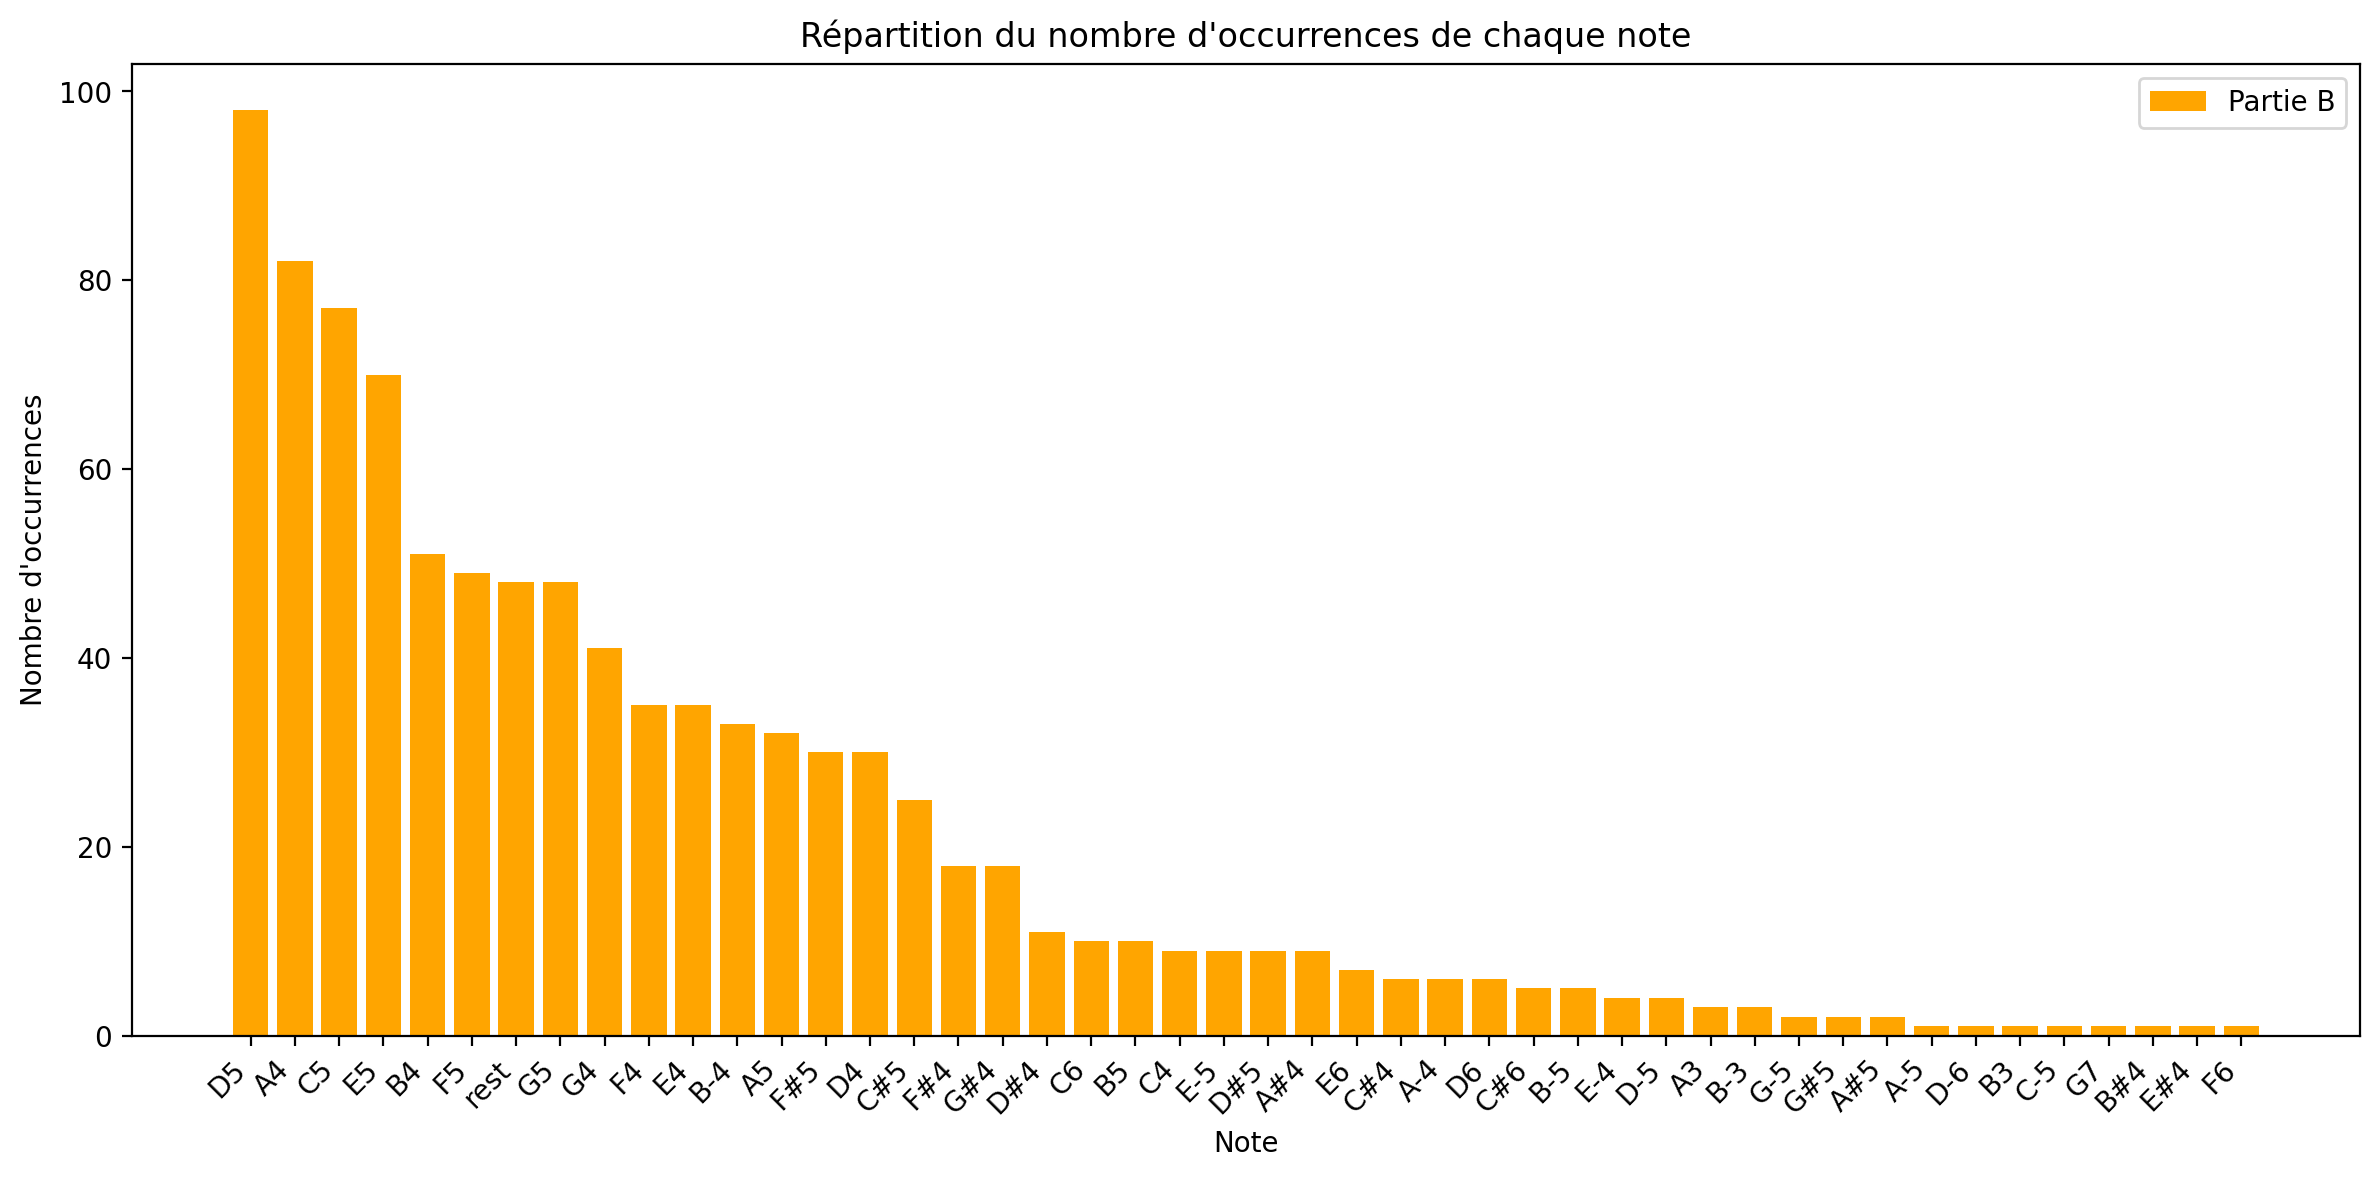

In [14]:
note_counts_A_sum = note_counts_A_sum.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(note_counts_A_sum.index, note_counts_A_sum.values, label='Partie A')
plt.xlabel('Note')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition du nombre d\'occurrences de chaque note')
plt.xticks(rotation=45, ha='right')  
plt.legend()
plt.tight_layout()
plt.show()

note_counts_B_sum = note_counts_B_sum.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(note_counts_B_sum.index, note_counts_B_sum.values, label='Partie B', color='orange')
plt.xlabel('Note')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition du nombre d\'occurrences de chaque note')
plt.xticks(rotation=45, ha='right') 
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
df_A_sorted = pd.DataFrame({'Note': note_counts_A_sum.index, 'Occurrences': note_counts_A_sum.values})

print("Partie A - Répartition du nombre d'occurrences de chaque note")
print(df_A_sorted)


Partie A - Répartition du nombre d'occurrences de chaque note
    Note  Occurrences
0     A4         99.0
1     D5         89.0
2   rest         66.0
3     G4         65.0
4     C5         64.0
5     E5         64.0
6     B4         49.0
7     E4         46.0
8     F5         46.0
9     F4         37.0
10    G5         31.0
11   B-4         26.0
12    D4         24.0
13    A5         23.0
14   F#5         16.0
15   F#4         14.0
16   B-5         12.0
17   C#5         12.0
18    C4         12.0
19   E-5         11.0
20    B5          9.0
21    B3          9.0
22   B-3          6.0
23   G#4          6.0
24    A3          6.0
25   C#4          5.0
26   F#3          4.0
27   E-4          4.0
28   D#4          4.0
29    E6          4.0
30    D6          4.0
31   A-4          3.0
32    G3          3.0
33   G#3          3.0
34    E3          3.0
35   G#5          3.0
36    F6          2.0
37   E-6          2.0
38   G-4          1.0
39   D-5          1.0
40   C#6          1.0
41   D#5      

In [16]:
df_B_sorted = pd.DataFrame({'Note': note_counts_B_sum.index, 'Occurrences': note_counts_B_sum.values})

print("\nPartie B - Répartition du nombre d'occurrences de chaque note - Mesure 1")
print(df_B_sorted)


Partie B - Répartition du nombre d'occurrences de chaque note - Mesure 1
    Note  Occurrences
0     D5         98.0
1     A4         82.0
2     C5         77.0
3     E5         70.0
4     B4         51.0
5     F5         49.0
6   rest         48.0
7     G5         48.0
8     G4         41.0
9     F4         35.0
10    E4         35.0
11   B-4         33.0
12    A5         32.0
13   F#5         30.0
14    D4         30.0
15   C#5         25.0
16   F#4         18.0
17   G#4         18.0
18   D#4         11.0
19    C6         10.0
20    B5         10.0
21    C4          9.0
22   E-5          9.0
23   D#5          9.0
24   A#4          9.0
25    E6          7.0
26   C#4          6.0
27   A-4          6.0
28    D6          6.0
29   C#6          5.0
30   B-5          5.0
31   E-4          4.0
32   D-5          4.0
33    A3          3.0
34   B-3          3.0
35   G-5          2.0
36   G#5          2.0
37   A#5          2.0
38   A-5          1.0
39   D-6          1.0
40    B3          1.0
41

In [17]:
note_percentages_A = (note_counts_A_sum / note_counts_A_sum.sum()) * 100
note_percentages_B = (note_counts_B_sum / note_counts_B_sum.sum()) * 100

note_percentages_A = note_percentages_A.sort_values(ascending=False)
note_percentages_B = note_percentages_B.sort_values(ascending=False)



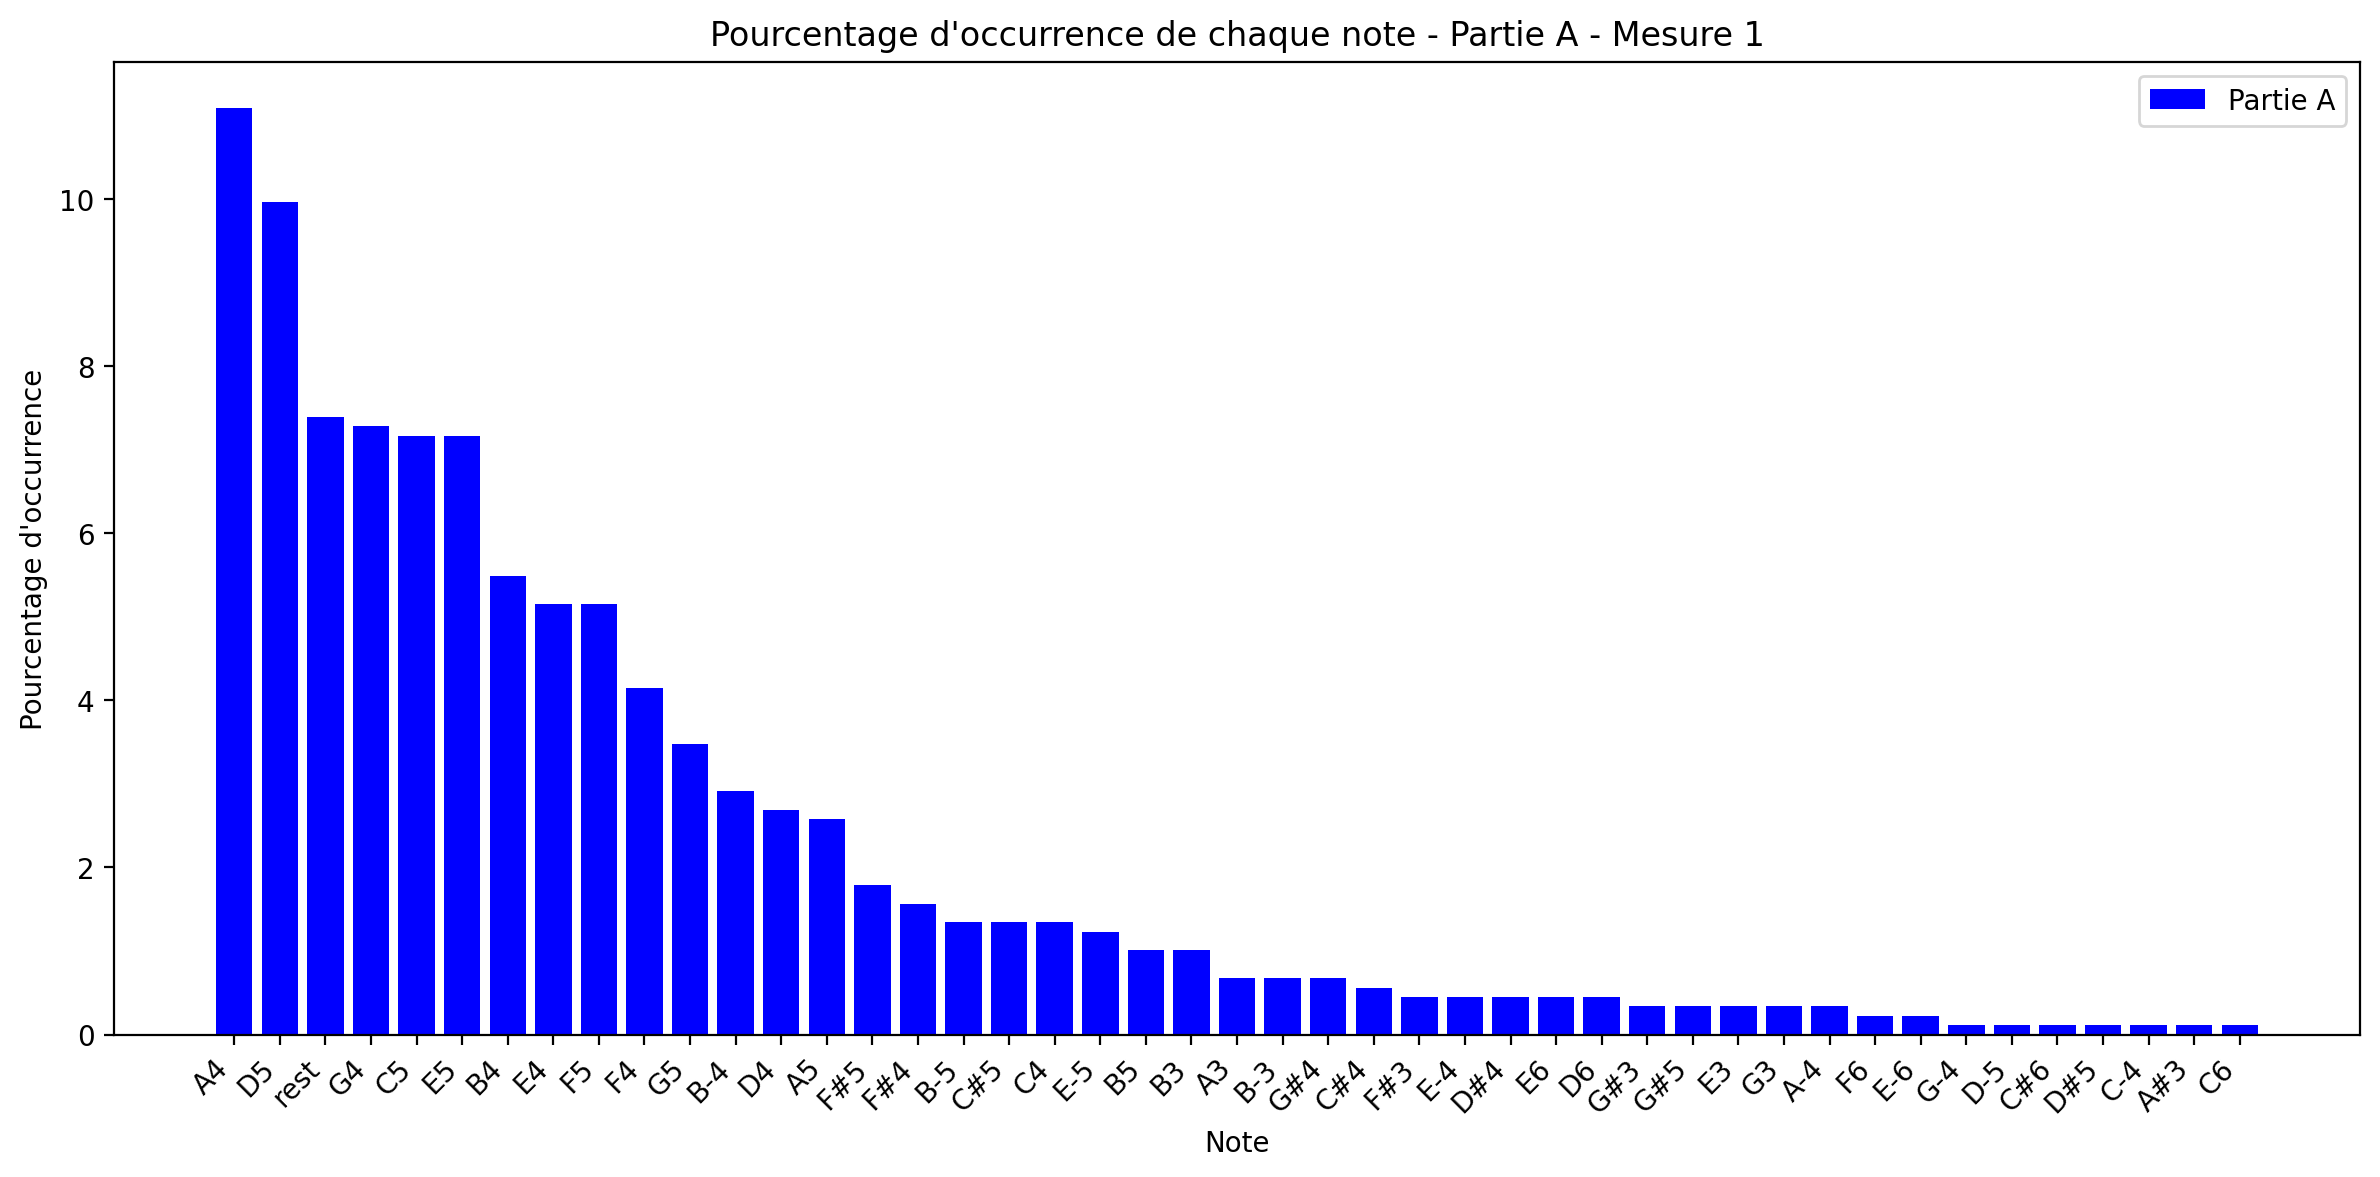

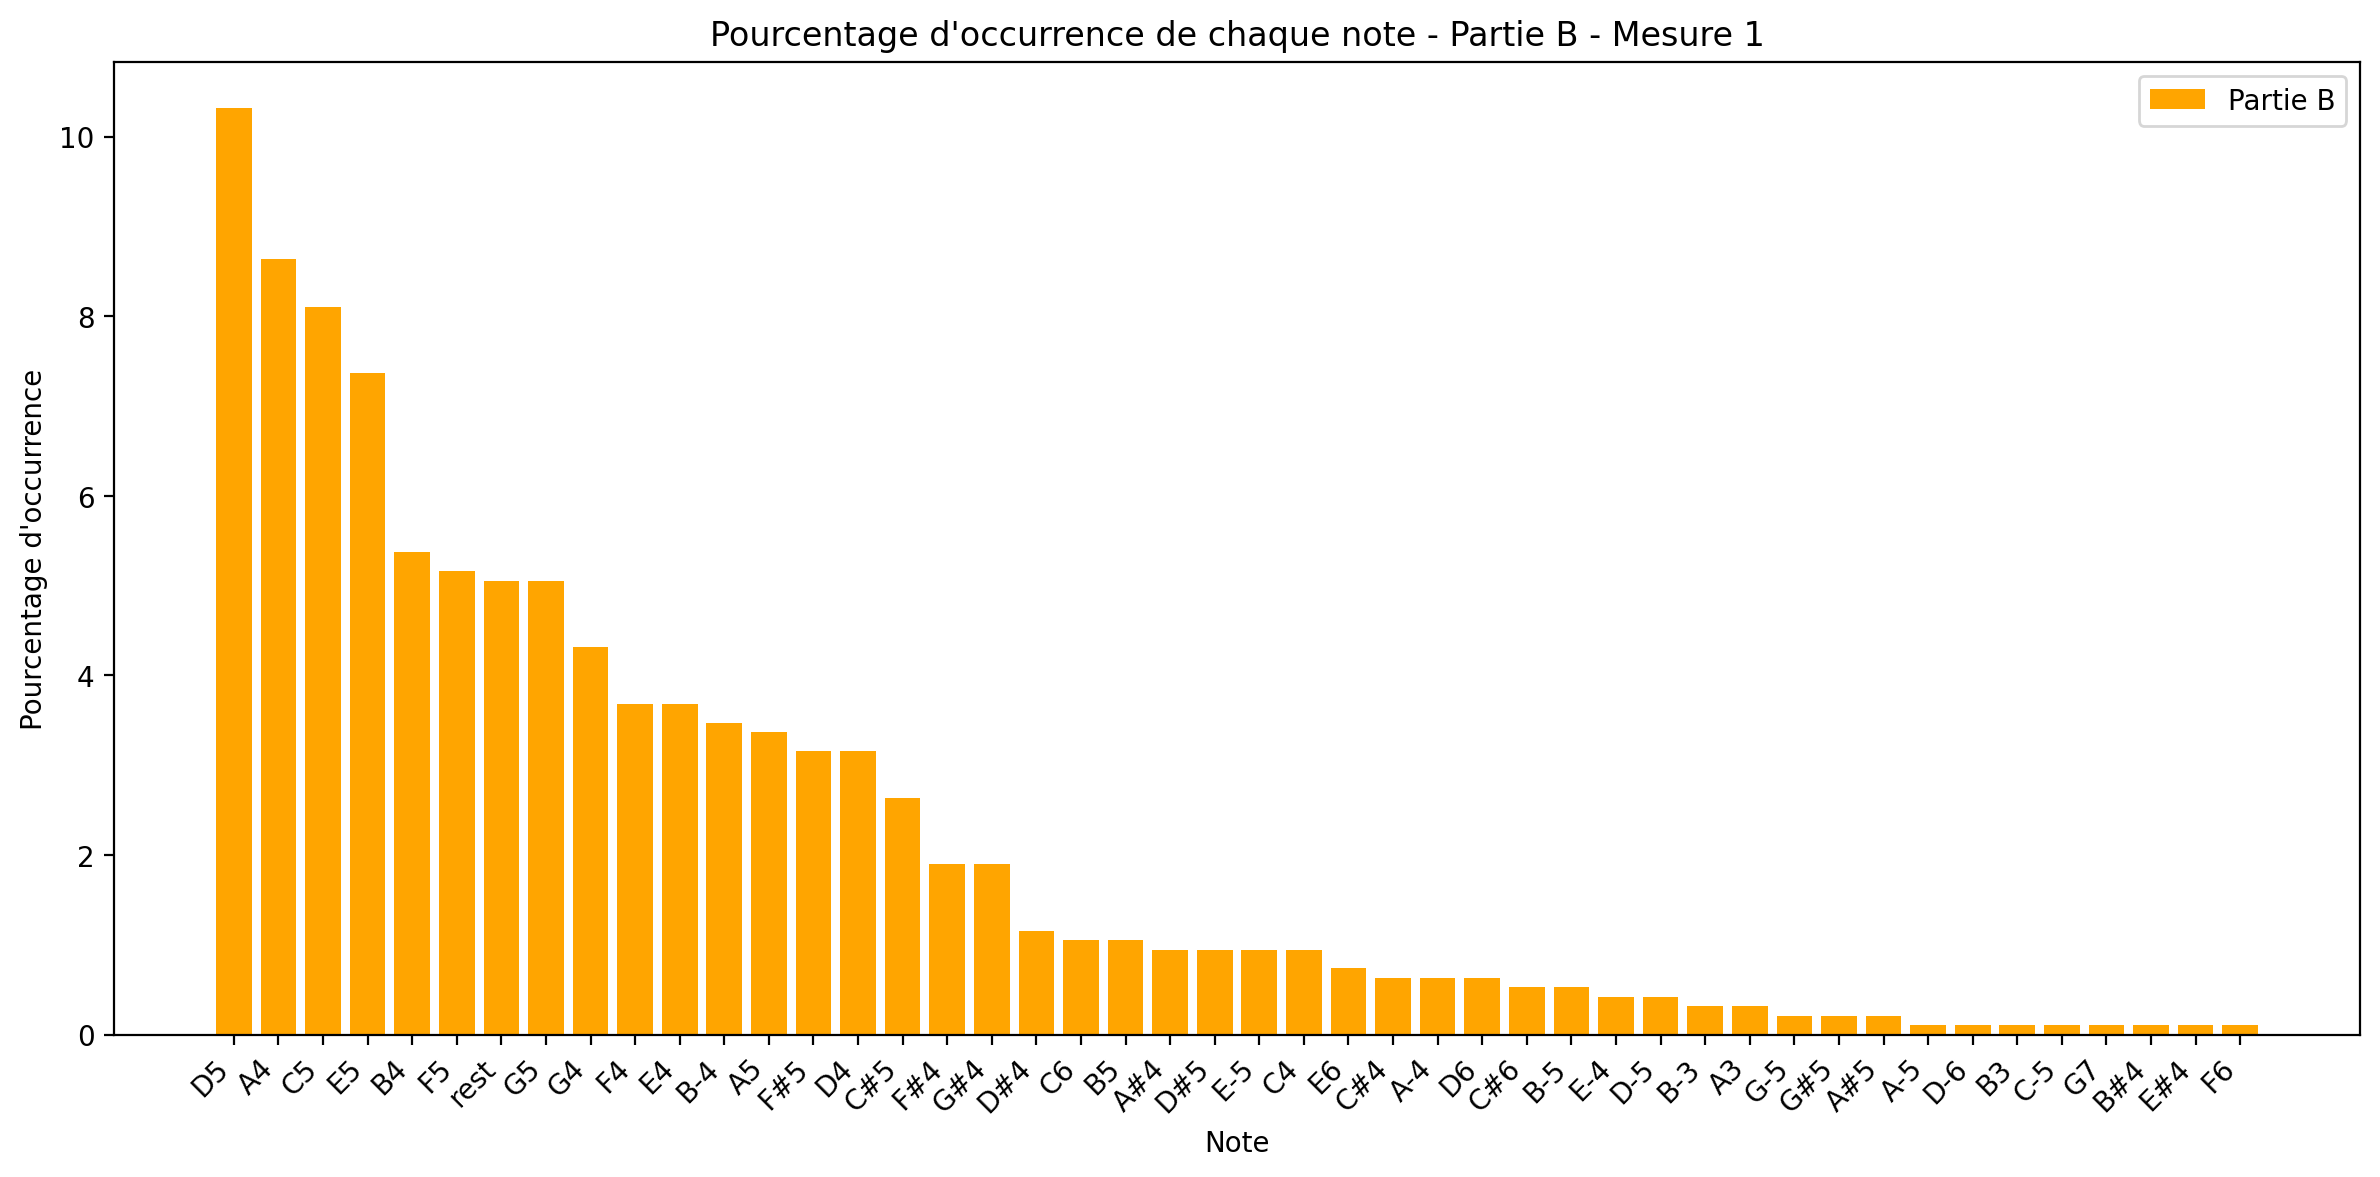

In [18]:
plt.figure(figsize=(12, 6))
plt.bar(note_percentages_A.index, note_percentages_A.values, label='Partie A', color='blue')


plt.xlabel('Note')
plt.ylabel('Pourcentage d\'occurrence')
plt.title('Pourcentage d\'occurrence de chaque note - Partie A - Mesure 1')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(note_percentages_B.index, note_percentages_B.values, label='Partie B', color='orange')

plt.xlabel('Note')
plt.ylabel('Pourcentage d\'occurrence')
plt.title('Pourcentage d\'occurrence de chaque note - Partie B - Mesure 1')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
df_A_pn = pd.DataFrame({'Note': note_percentages_A.index, 'Pourcentage d\'occurrence (Partie A) - Mesure 1': note_percentages_A.values})
df_B_pn = pd.DataFrame({'Note': note_percentages_B.index, 'Pourcentage d\'occurrence (Partie B) - Mesure 1': note_percentages_B.values})

print("Partie A:")
print(df_A_pn)

Partie A:
    Note  Pourcentage d'occurrence (Partie A) - Mesure 1
0     A4                                       11.086226
1     D5                                        9.966405
2   rest                                        7.390817
3     G4                                        7.278835
4     C5                                        7.166853
5     E5                                        7.166853
6     B4                                        5.487122
7     E4                                        5.151176
8     F5                                        5.151176
9     F4                                        4.143337
10    G5                                        3.471445
11   B-4                                        2.911534
12    D4                                        2.687570
13    A5                                        2.575588
14   F#5                                        1.791713
15   F#4                                        1.567749
16   B-5             

In [20]:
print("\nPartie B - Mesure 1 :")
print(df_B_pn)


Partie B - Mesure 1 :
    Note  Pourcentage d'occurrence (Partie B) - Mesure 1
0     D5                                       10.315789
1     A4                                        8.631579
2     C5                                        8.105263
3     E5                                        7.368421
4     B4                                        5.368421
5     F5                                        5.157895
6   rest                                        5.052632
7     G5                                        5.052632
8     G4                                        4.315789
9     F4                                        3.684211
10    E4                                        3.684211
11   B-4                                        3.473684
12    A5                                        3.368421
13   F#5                                        3.157895
14    D4                                        3.157895
15   C#5                                        2.631579
16   F#4

### Sur une partie en particulier

In [22]:
def count_notes(list_notes):
    return dict(Counter(accord[0] for accord in list_notes))

for part in ['A', 'B','C']:
    for measure in range(1, 37):  #Prend en compte 36 mesures max par partie
        df[f'Note_Count_{part}_{measure}'] = df[f'{part}.{measure}.Notes'].apply(lambda x: count_notes(x) if isinstance(x, list) else {})

cpt_notes = {}
for part in ['A', 'B','C']:
    cpt_notes[part] = {}
    for measure in range(1, 37):
        cpt_notes[part][measure] = pd.DataFrame(df[f'Note_Count_{part}_{measure}'].tolist()).fillna(0)

cpt_notes_sum = {}
for part in ['A', 'B','C']:
    cpt_notes_sum[part] = {}
    for measure in range(1, 37):
        cpt_notes_sum[part][measure] = cpt_notes[part][measure].sum()

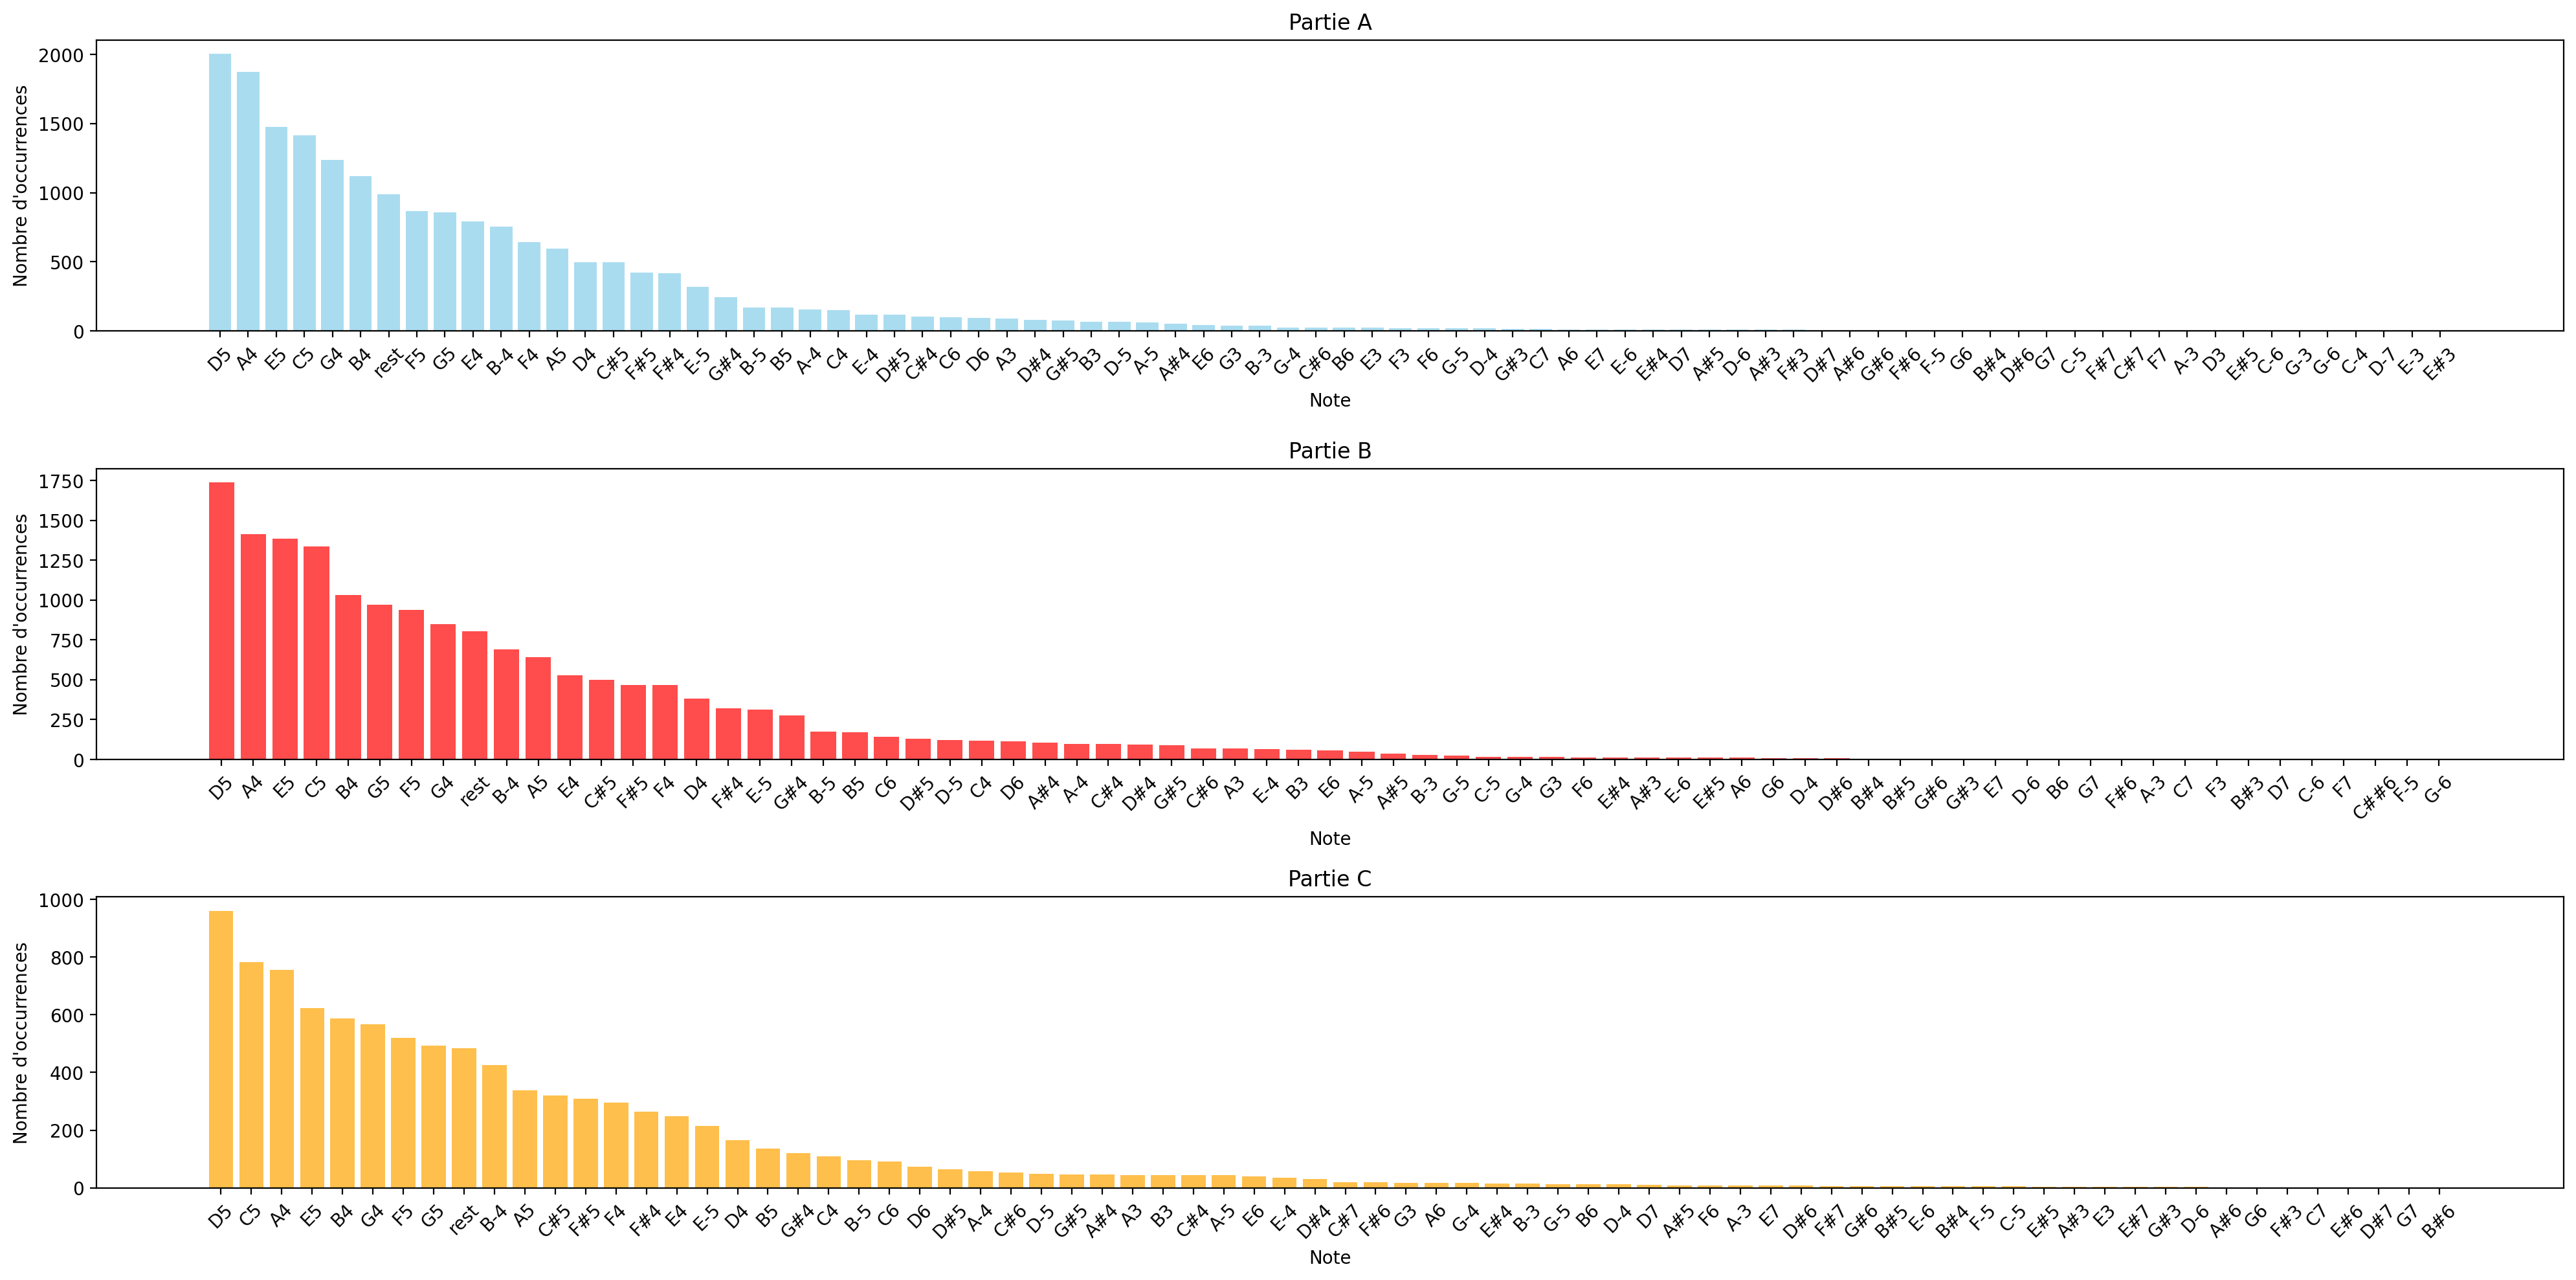

In [23]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10))

colors=['skyblue','red','orange']

for i, part in enumerate(['A', 'B','C']):
    cumulative_counts = pd.DataFrame()
    for measure in range(1, 37): # Somme des comptages cumulés de chaque note pour chaque mesure
        cumulative_counts = cumulative_counts.add(cpt_notes[part][measure], fill_value=0)

    total_counts = cumulative_counts.sum()
    total_counts = total_counts.sort_values(ascending=False)
    axs[i].bar(total_counts.index, total_counts.values, alpha=0.7, color=colors[i])

    axs[i].set_title(f'Partie {part}')
    axs[i].set_xlabel('Note')
    axs[i].set_ylabel('Nombre d\'occurrences')
    axs[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


In [26]:
note_percentages = {}
for part in ['A', 'B', 'C']:
    note_percentages[part] = {}
    for measure in range(1, 37):
        note_counts_sum = cpt_notes_sum[part][measure]
        note_percentages[part][measure] = note_counts_sum / note_counts_sum.sum() * 100

note_percentages_agg = {}
for part in ['A', 'B', 'C']:
    part_percentages = [note_percentages[part][measure] for measure in range(1, 37)]
    note_percentages_agg[part] = pd.concat(part_percentages, axis=1).mean(axis=1).sort_values(ascending=False)


In [27]:
part='A'

df_part_pn = pd.DataFrame({'Note': note_percentages_agg[part].index, f'Pourcentage d\'occurrence (Partie {part})': note_percentages_agg[part].values})
print(f"Partie {part}:")
print(df_part_pn)


Partie A:
   Note  Pourcentage d'occurrence (Partie A)
0    D5                            11.497440
1    A4                             9.301158
2    E5                             7.599787
3    C5                             7.466372
4    G4                             6.263517
..  ...                                  ...
75  A-3                             0.106377
76  E#3                             0.102145
77  C-6                             0.100200
78  E#5                             0.100050
79  E-3                             0.095877

[80 rows x 2 columns]


In [28]:
part='B'

df_part_pn = pd.DataFrame({'Note': note_percentages_agg[part].index, f'Pourcentage d\'occurrence (Partie {part})': note_percentages_agg[part].values})
print(f"Partie {part}:")
print(df_part_pn)

Partie B:
   Note  Pourcentage d'occurrence (Partie B)
0    D5                             9.933603
1    C5                             8.132723
2    E5                             7.969039
3    A4                             7.485652
4    G5                             6.333208
..  ...                                  ...
66  F-5                             0.108696
67  C-6                             0.105374
68   B6                             0.104339
69   D7                             0.098774
70   F7                             0.097847

[71 rows x 2 columns]


In [29]:
part='C'

df_part_pn = pd.DataFrame({'Note': note_percentages_agg[part].index, f'Pourcentage d\'occurrence (Partie {part})': note_percentages_agg[part].values})
print(f"Partie {part}:")
print(df_part_pn)

Partie C:
   Note  Pourcentage d'occurrence (Partie C)
0    D5                             9.501868
1    A4                             8.585169
2    B4                             7.245357
3    C5                             6.563967
4    G4                             6.137004
..  ...                                  ...
69  A#6                             0.181526
70  D-6                             0.179752
71   G6                             0.175276
72  A#3                             0.171111
73  B#6                             0.160000

[74 rows x 2 columns]


## Accords

### Sur une mesure en particulier 

In [31]:
def count_accords(accord_list):
    return dict(Counter(accord[0] for accord in accord_list))

df['Accords_Count_A'] = df['A.1.Accords'].apply(lambda x: count_accords(x) if isinstance(x, list) else {})
df['Accords_Count_B'] = df['B.1.Accords'].apply(lambda x: count_accords(x) if isinstance(x, list) else {})

accord_counts_A = pd.DataFrame(df['Accords_Count_A'].tolist()).fillna(0)
accord_counts_B = pd.DataFrame(df['Accords_Count_B'].tolist()).fillna(0)

accord_counts_A_sum = accord_counts_A.sum()
accord_counts_B_sum = accord_counts_B.sum()

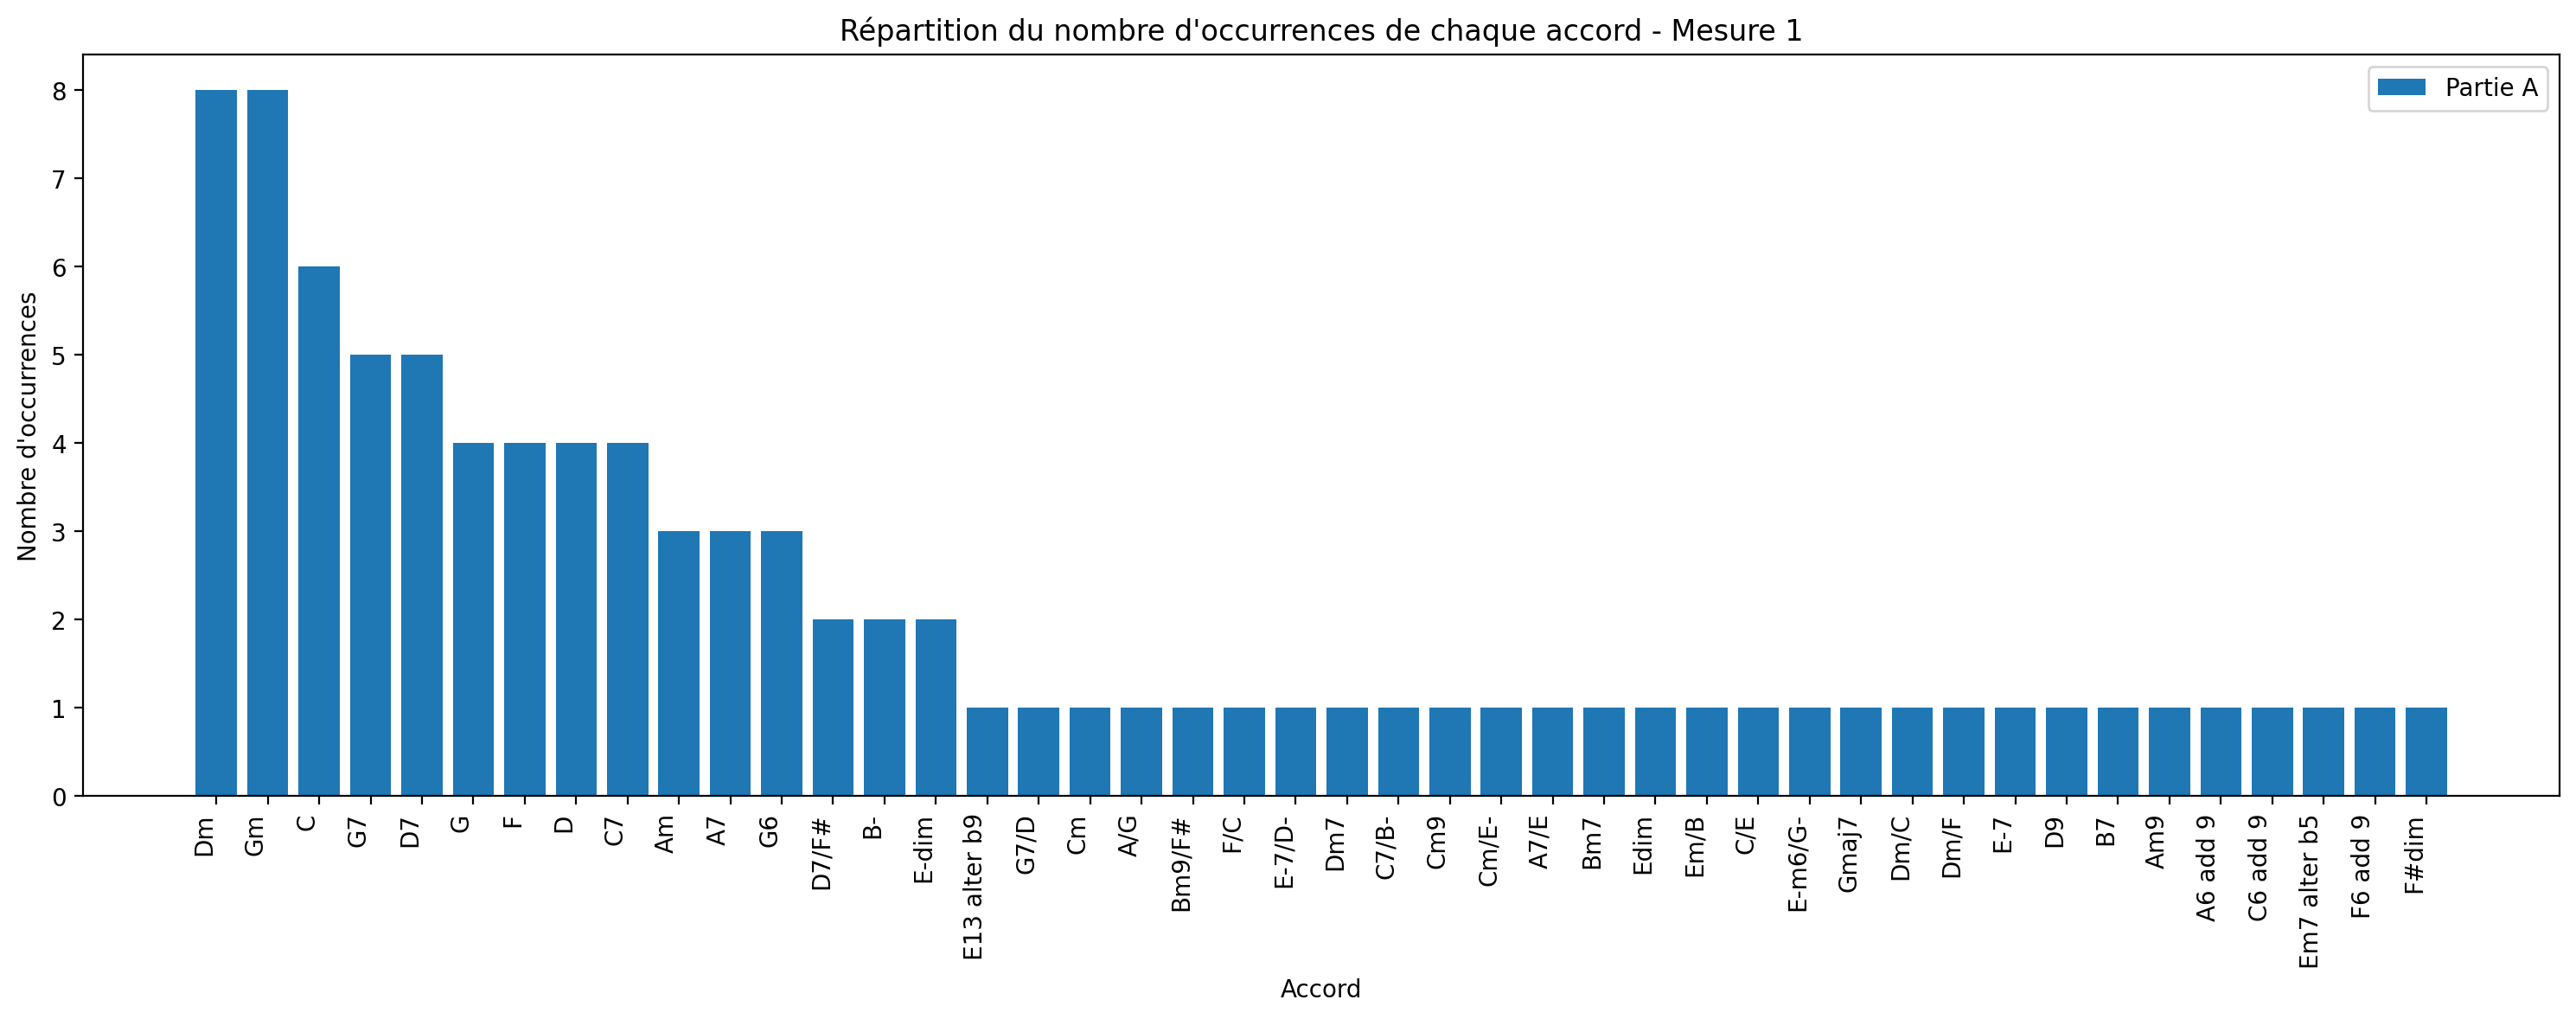

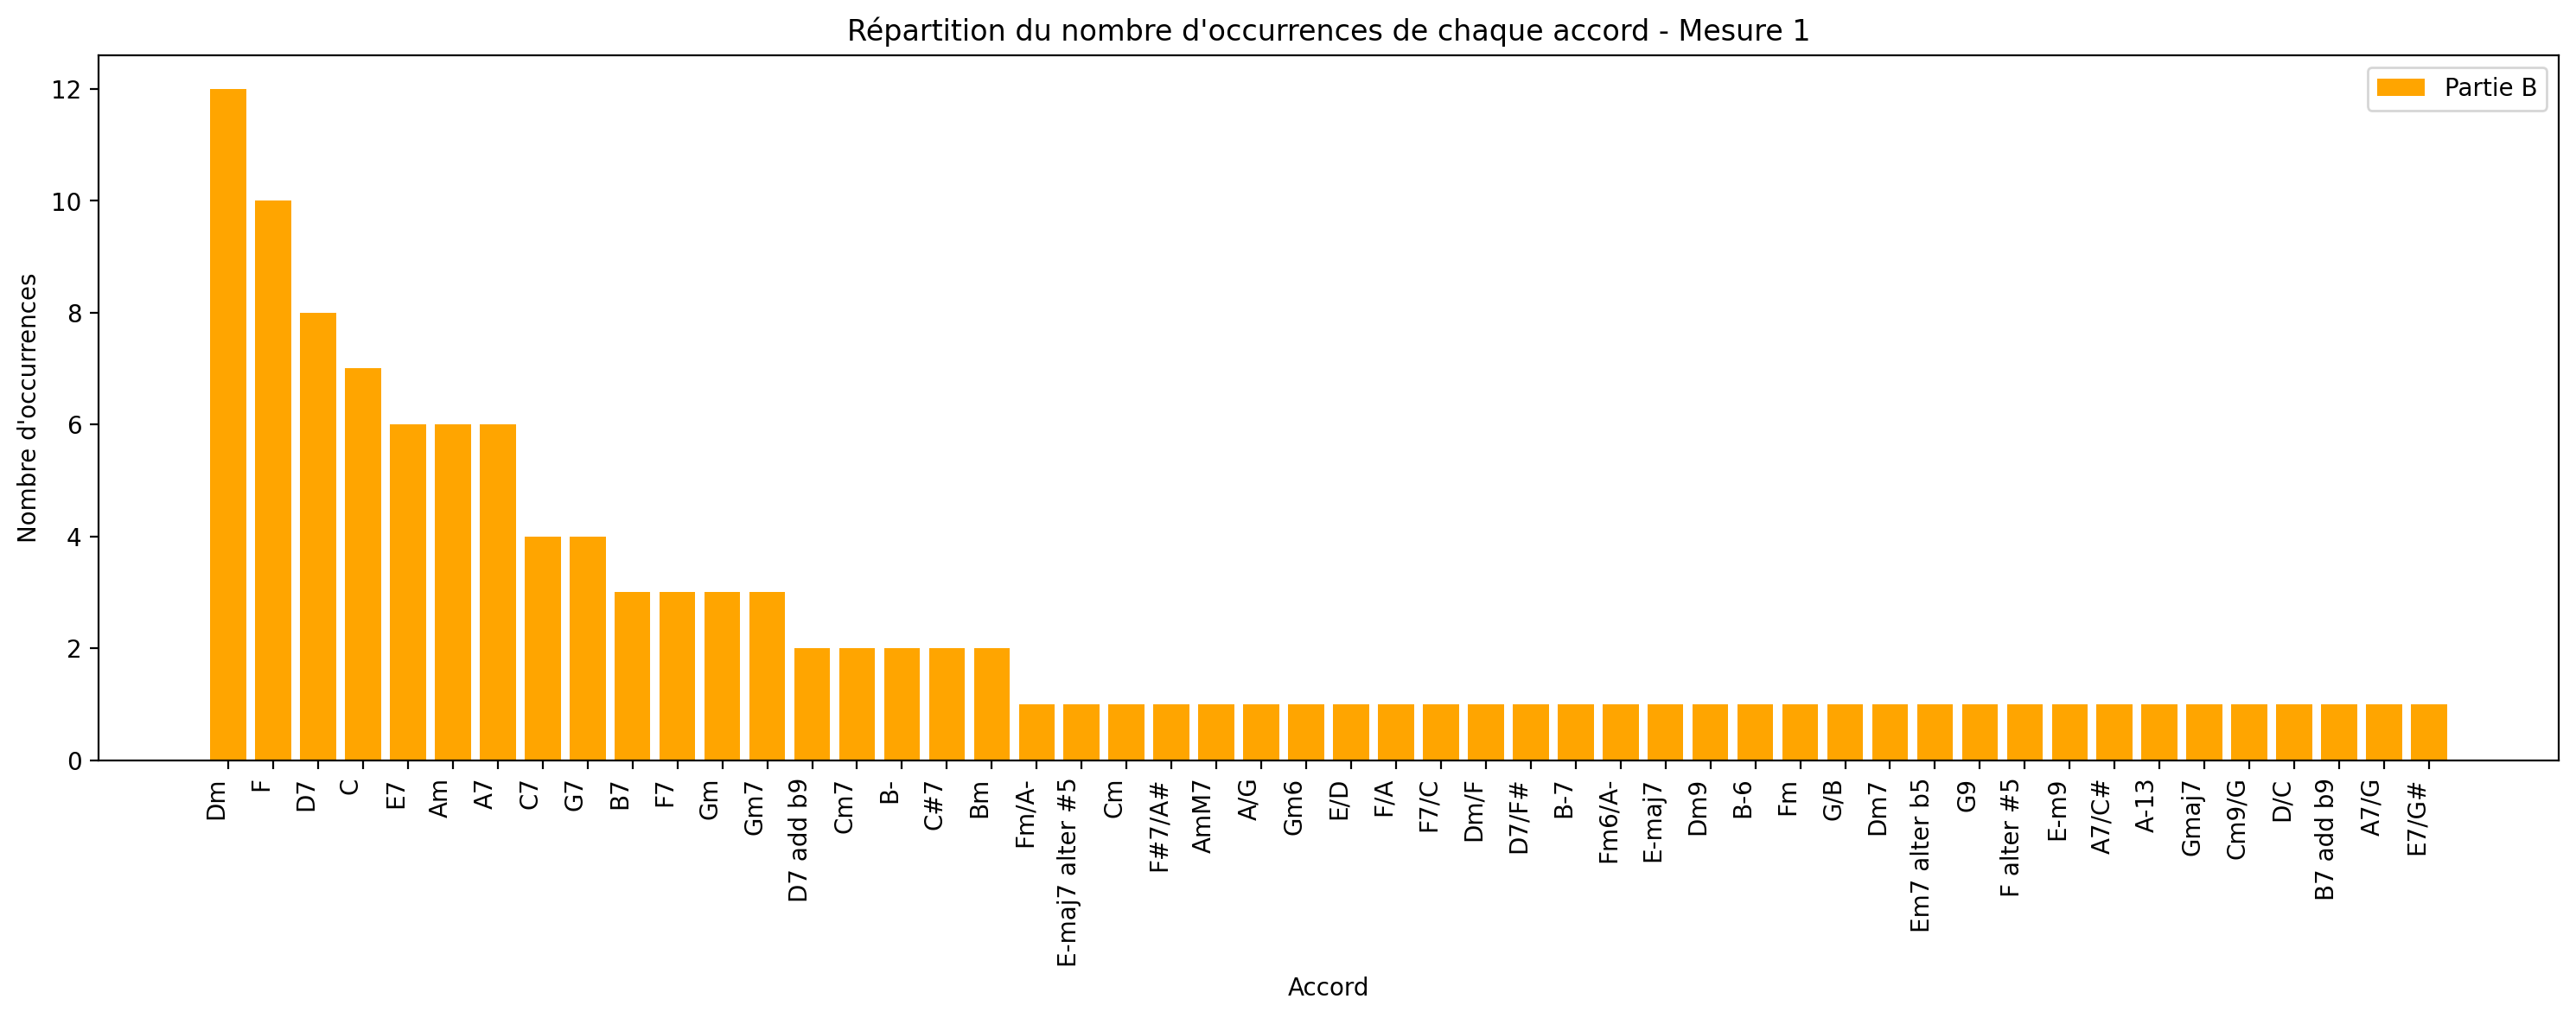

In [32]:
accord_counts_A_sum = accord_counts_A_sum.sort_values(ascending=False)

plt.figure(figsize=(15, 6))
plt.bar(accord_counts_A_sum.index, accord_counts_A_sum.values, label='Partie A')
plt.xlabel('Accord')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition du nombre d\'occurrences de chaque accord - Mesure 1')
plt.xticks(rotation=90, ha='right')  
plt.legend()
plt.tight_layout()
plt.show()

accord_counts_B_sum = accord_counts_B_sum.sort_values(ascending=False)

plt.figure(figsize=(15, 6))
plt.bar(accord_counts_B_sum.index, accord_counts_B_sum.values, label='Partie B', color='orange')
plt.xlabel('Accord')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition du nombre d\'occurrences de chaque accord - Mesure 1')
plt.xticks(rotation=90, ha='right') 
plt.legend()
plt.tight_layout()
plt.show()


### Sur une partie en particulier 

In [34]:
for part in ['A', 'B','C']:
    for measure in range(1, 37):  #Prend en compte 36 mesures max par partie
        df[f'Accords_Count_{part}_{measure}'] = df[f'{part}.{measure}.Accords'].apply(lambda x: count_accords(x) if isinstance(x, list) else {})

accord_counts = {}
for part in ['A', 'B','C']:
    accord_counts[part] = {}
    for measure in range(1, 37):
        accord_counts[part][measure] = pd.DataFrame(df[f'Accords_Count_{part}_{measure}'].tolist()).fillna(0)

accord_counts_sum = {}
for part in ['A', 'B','C']:
    accord_counts_sum[part] = {}
    for measure in range(1, 37):
        accord_counts_sum[part][measure] = accord_counts[part][measure].sum()


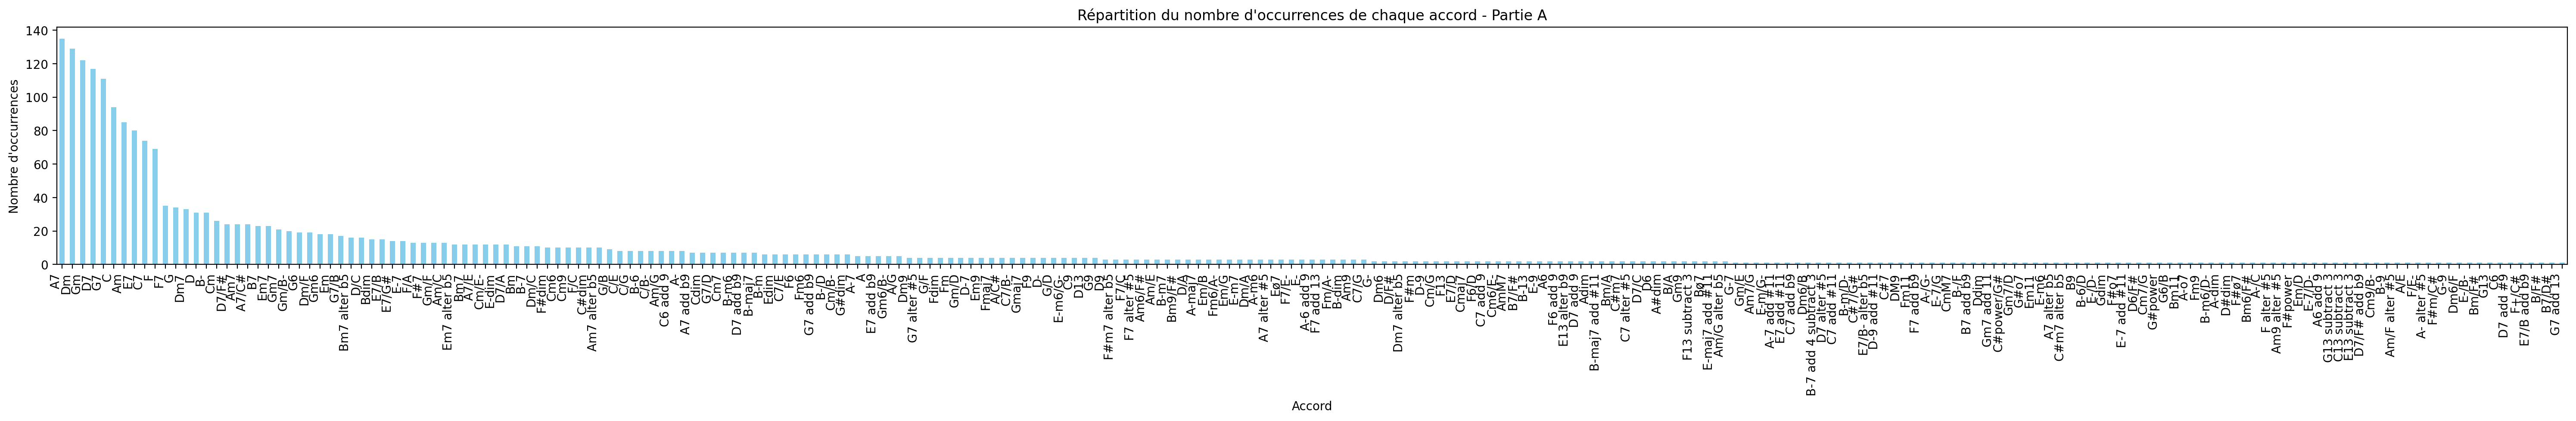

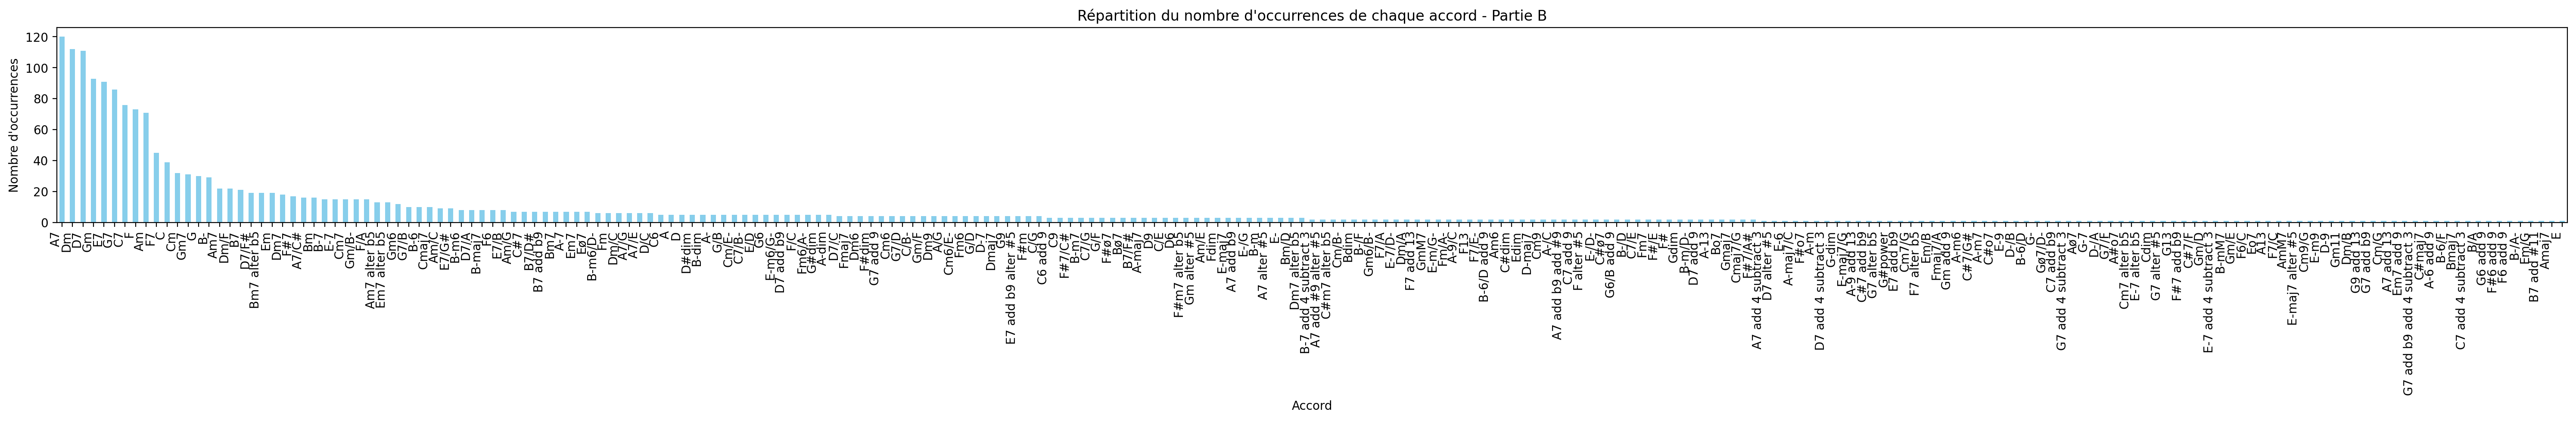

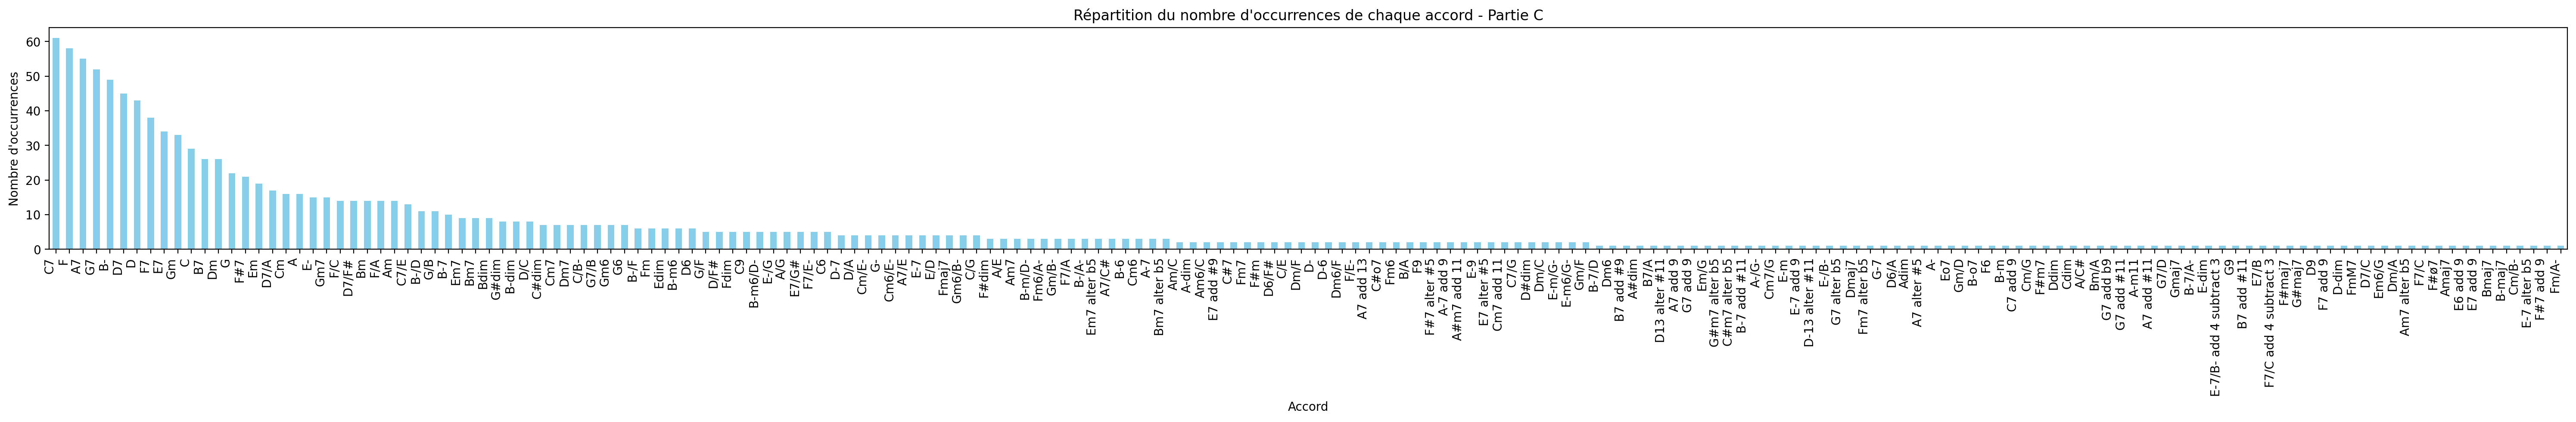

In [64]:
accord_counts_global = {}
for part in ['A', 'B', 'C']:
    part_counts = [accord_counts_sum[part][measure] for measure in range(1, 37)]
    accord_counts_global[part] = pd.concat(part_counts, axis=1).sum(axis=1).sort_values(ascending=False)

# Affichage de la répartition du nombre d'occurrences de chaque accord pour chaque partie
for part in ['A', 'B', 'C']:
    plt.figure(figsize=(30, 5))
    accord_counts_global[part].plot(kind='bar', color='skyblue')
    plt.title(f'Répartition du nombre d\'occurrences de chaque accord - Partie {part}')
    plt.xlabel('Accord')
    plt.ylabel('Nombre d\'occurrences')
    plt.xticks(rotation=90, ha='right') 
    plt.tight_layout()
    plt.show()


In [42]:
# Calcul du total d'accords pour chaque partie
total_accords = {}
for part in ['A', 'B', 'C']:
    total_accords[part] = accord_counts_global[part].sum()

# Affichage du total d'accords pour chaque partie
for part in ['A', 'B', 'C']:
    print(f"Total d'accords pour la partie {part}: {total_accords[part]}")


Total d'accords pour la partie A: 2261.0
Total d'accords pour la partie B: 1924.0
Total d'accords pour la partie C: 1205.0


## Expressions

## Sur une mesure en particulier

In [50]:
def count_exp(exp_list):
    return dict(Counter(exp[0] for exp in exp_list))

df['Exp_Count_A'] = df['A.1.Expressions'].apply(lambda x: count_exp(x) if isinstance(x, list) else {})
df['Exp_Count_B'] = df['B.1.Expressions'].apply(lambda x: count_exp(x) if isinstance(x, list) else {})

exp_counts_A = pd.DataFrame(df['Exp_Count_A'].tolist()).fillna(0)
exp_counts_B = pd.DataFrame(df['Exp_Count_B'].tolist()).fillna(0)

exp_counts_A_sum = exp_counts_A.sum()
exp_counts_B_sum = exp_counts_B.sum()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_7500\3221800059.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


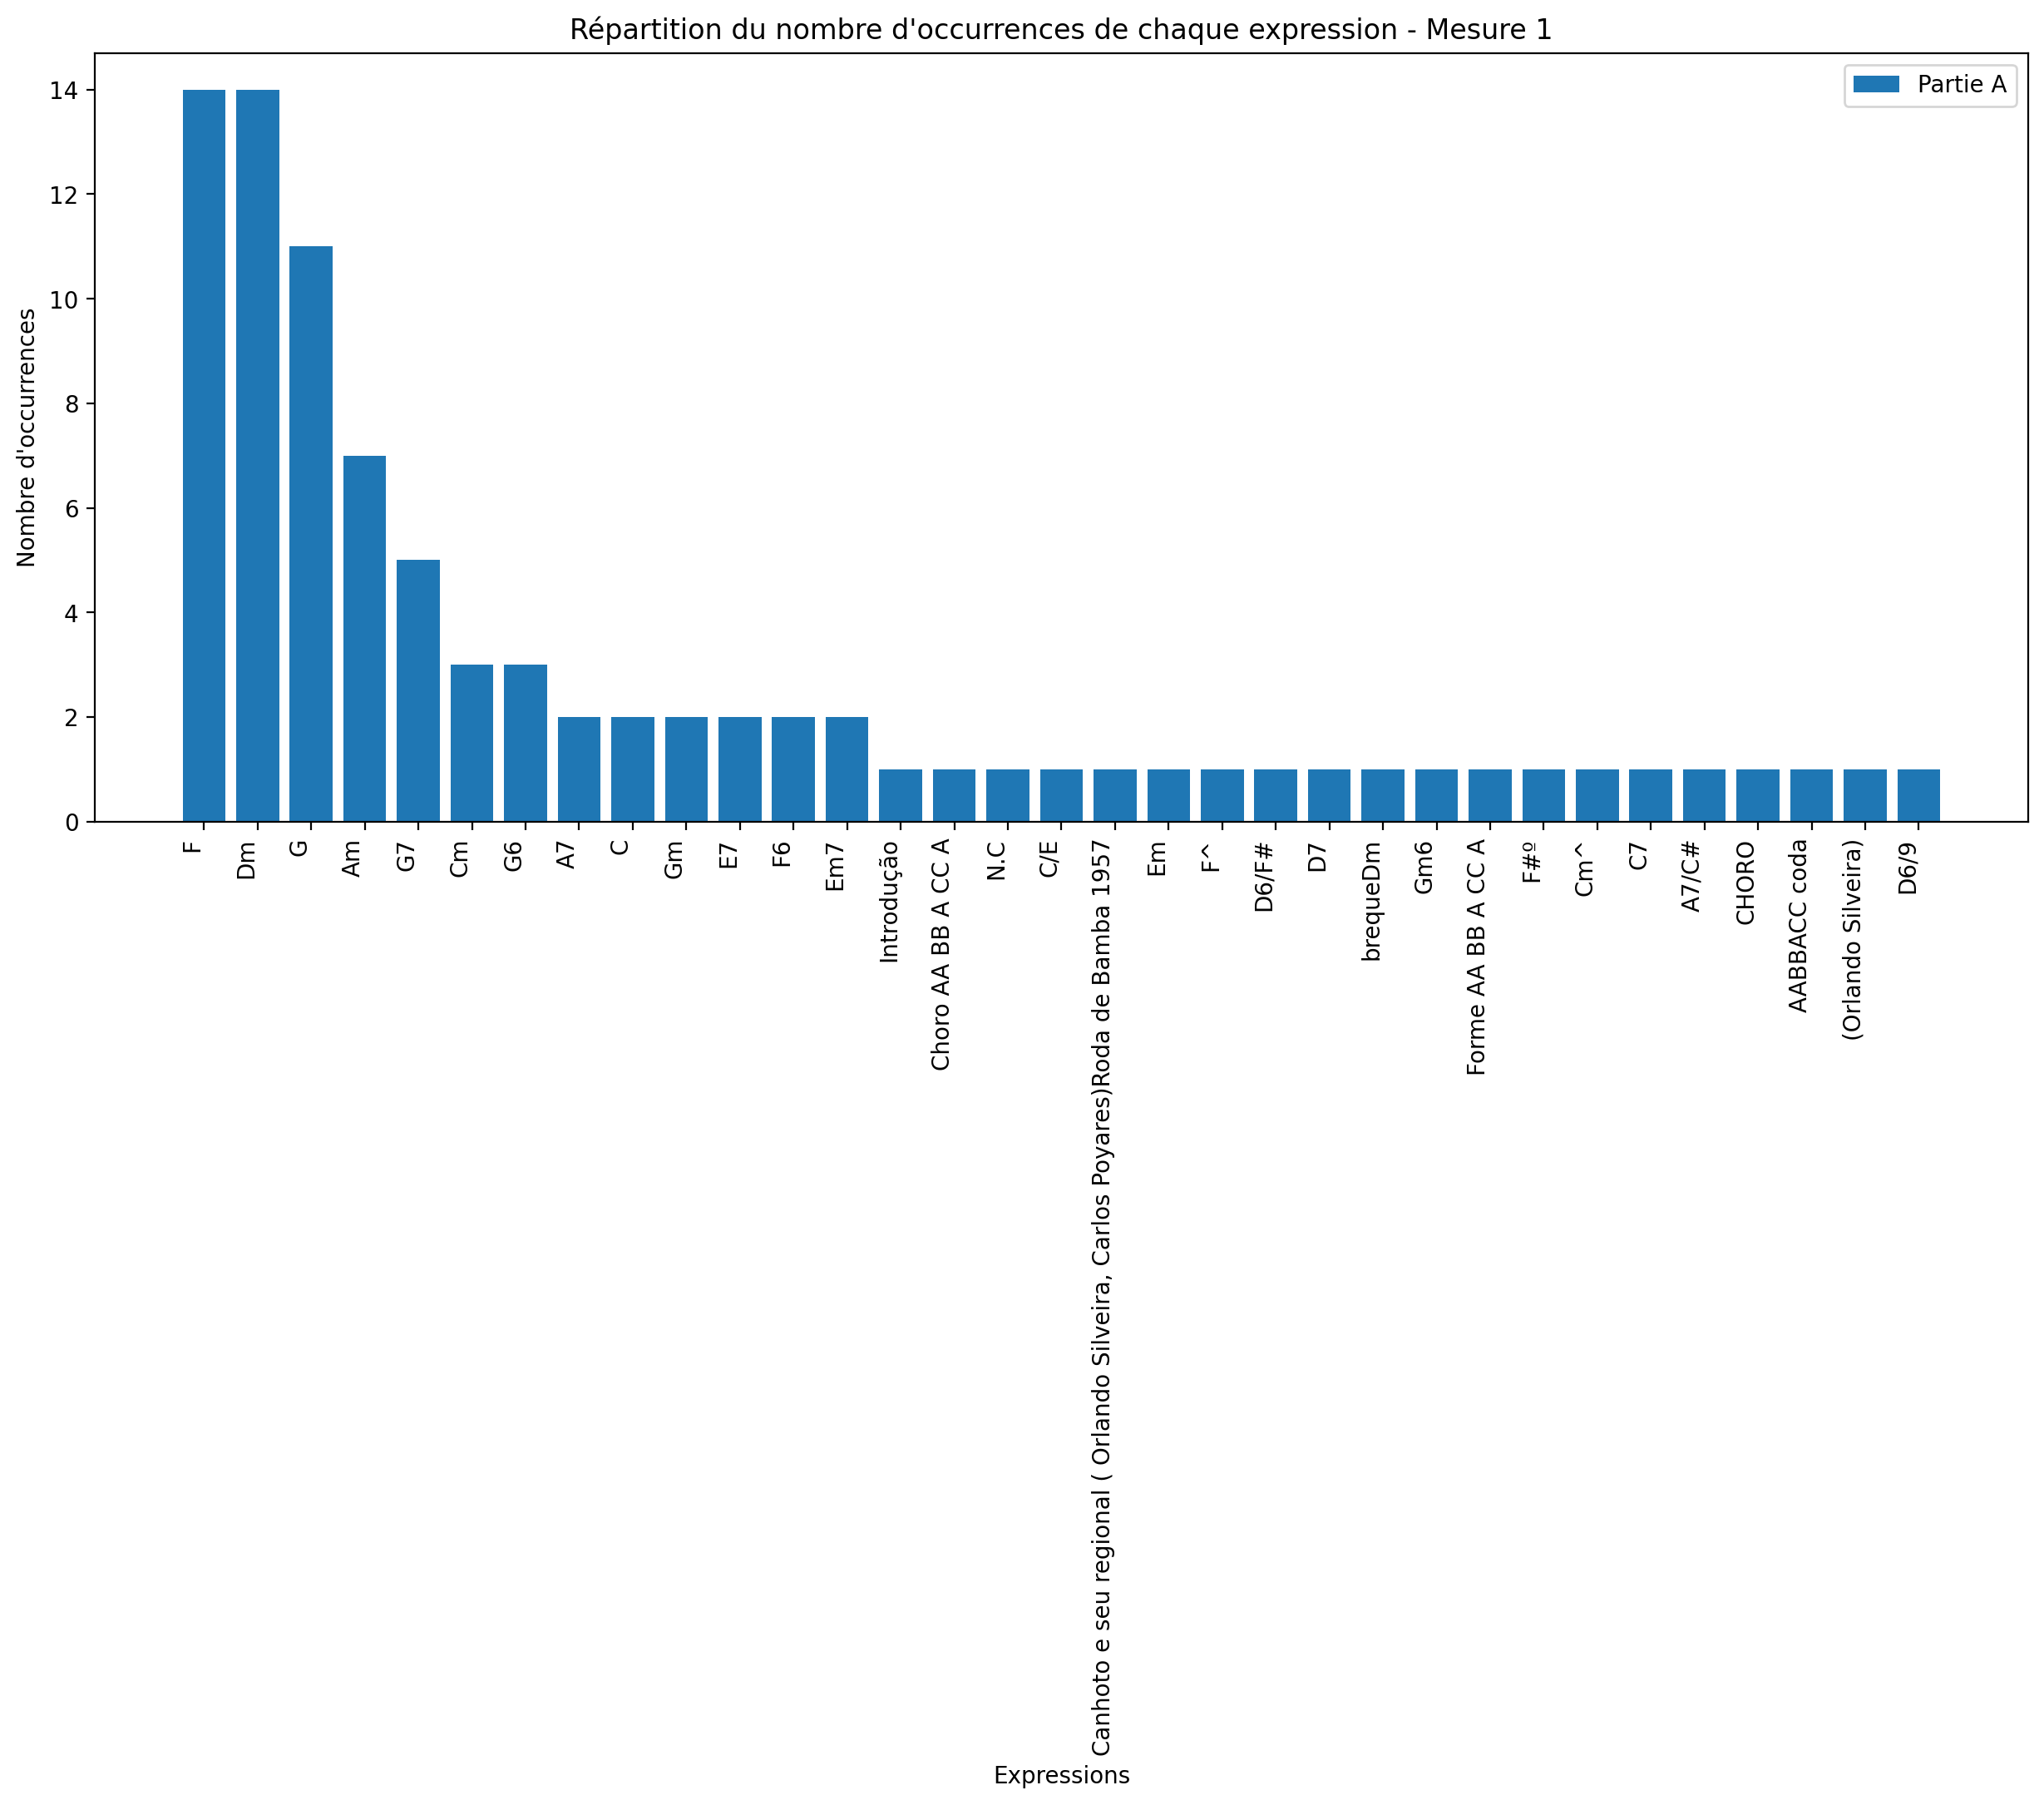

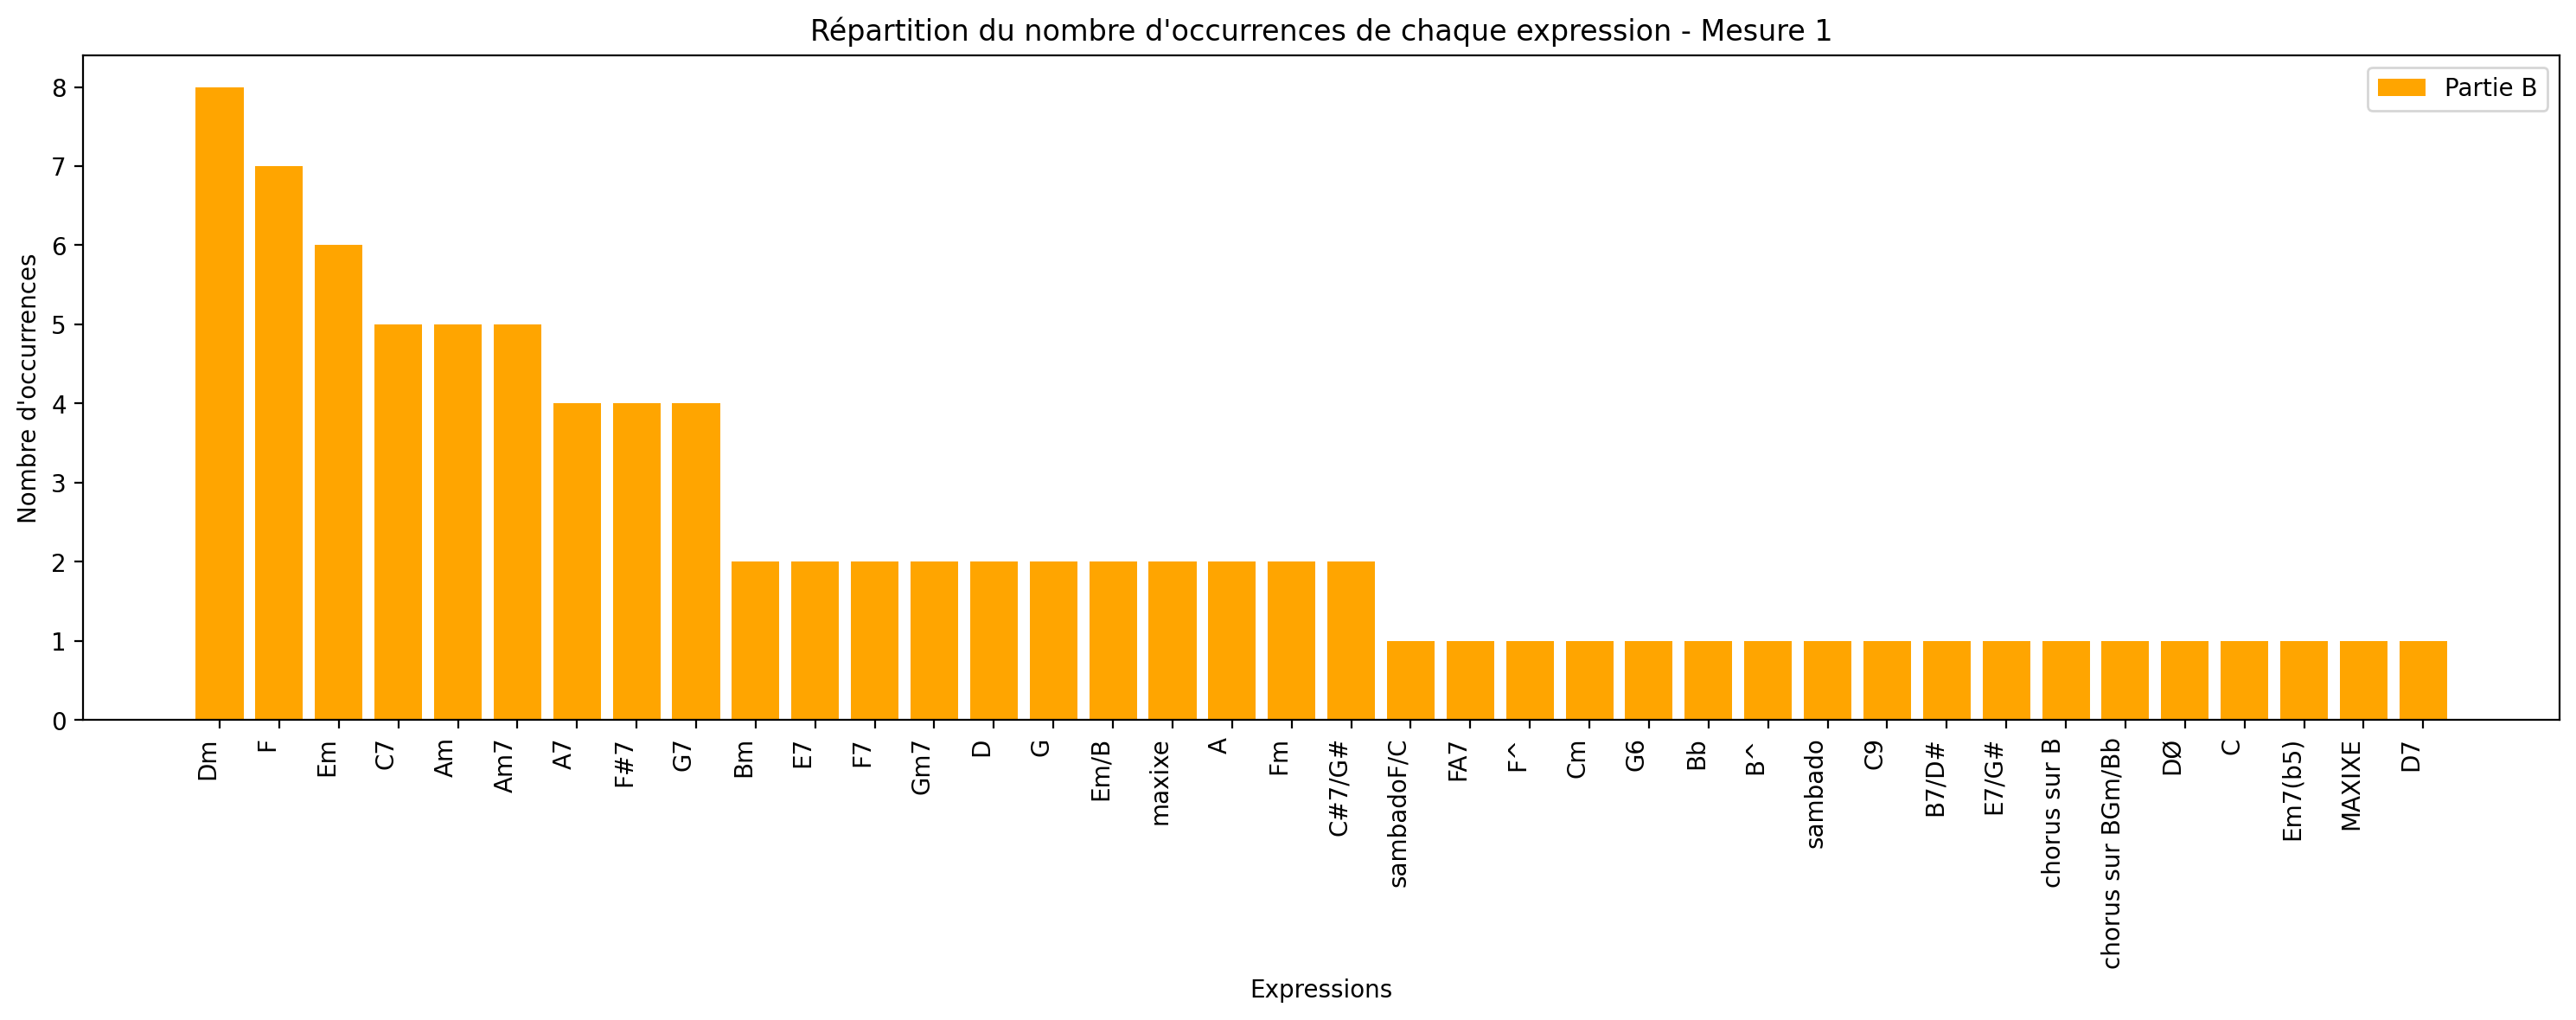

In [54]:
exp_counts_A_sum = exp_counts_A_sum.sort_values(ascending=False)

plt.figure(figsize=(15, 6))
plt.bar(exp_counts_A_sum.index, exp_counts_A_sum.values, label='Partie A')
plt.xlabel('Expressions')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition du nombre d\'occurrences de chaque expression - Mesure 1')
plt.xticks(rotation=90, ha='right')  
plt.legend()
plt.tight_layout()
plt.show()

exp_counts_B_sum = exp_counts_B_sum.sort_values(ascending=False)

plt.figure(figsize=(15, 6))
plt.bar(exp_counts_B_sum.index, exp_counts_B_sum.values, label='Partie B', color='orange')
plt.xlabel('Expressions')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition du nombre d\'occurrences de chaque expression - Mesure 1')
plt.xticks(rotation=90, ha='right') 
plt.legend()
plt.tight_layout()
plt.show()

## Sur une partie en particulier 

In [56]:
for part in ['A', 'B','C']:
    for measure in range(1, 37):  #Prend en compte 36 mesures max par partie
        df[f'Exp_Count_{part}_{measure}'] = df[f'{part}.{measure}.Expressions'].apply(lambda x: count_exp(x) if isinstance(x, list) else {})

exp_counts = {}
for part in ['A', 'B','C']:
    exp_counts[part] = {}
    for measure in range(1, 37):
        exp_counts[part][measure] = pd.DataFrame(df[f'Exp_Count_{part}_{measure}'].tolist()).fillna(0)

exp_counts_sum = {}
for part in ['A', 'B','C']:
    exp_counts_sum[part] = {}
    for measure in range(1, 37):
        exp_counts_sum[part][measure] = exp_counts[part][measure].sum()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_7500\3081408432.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


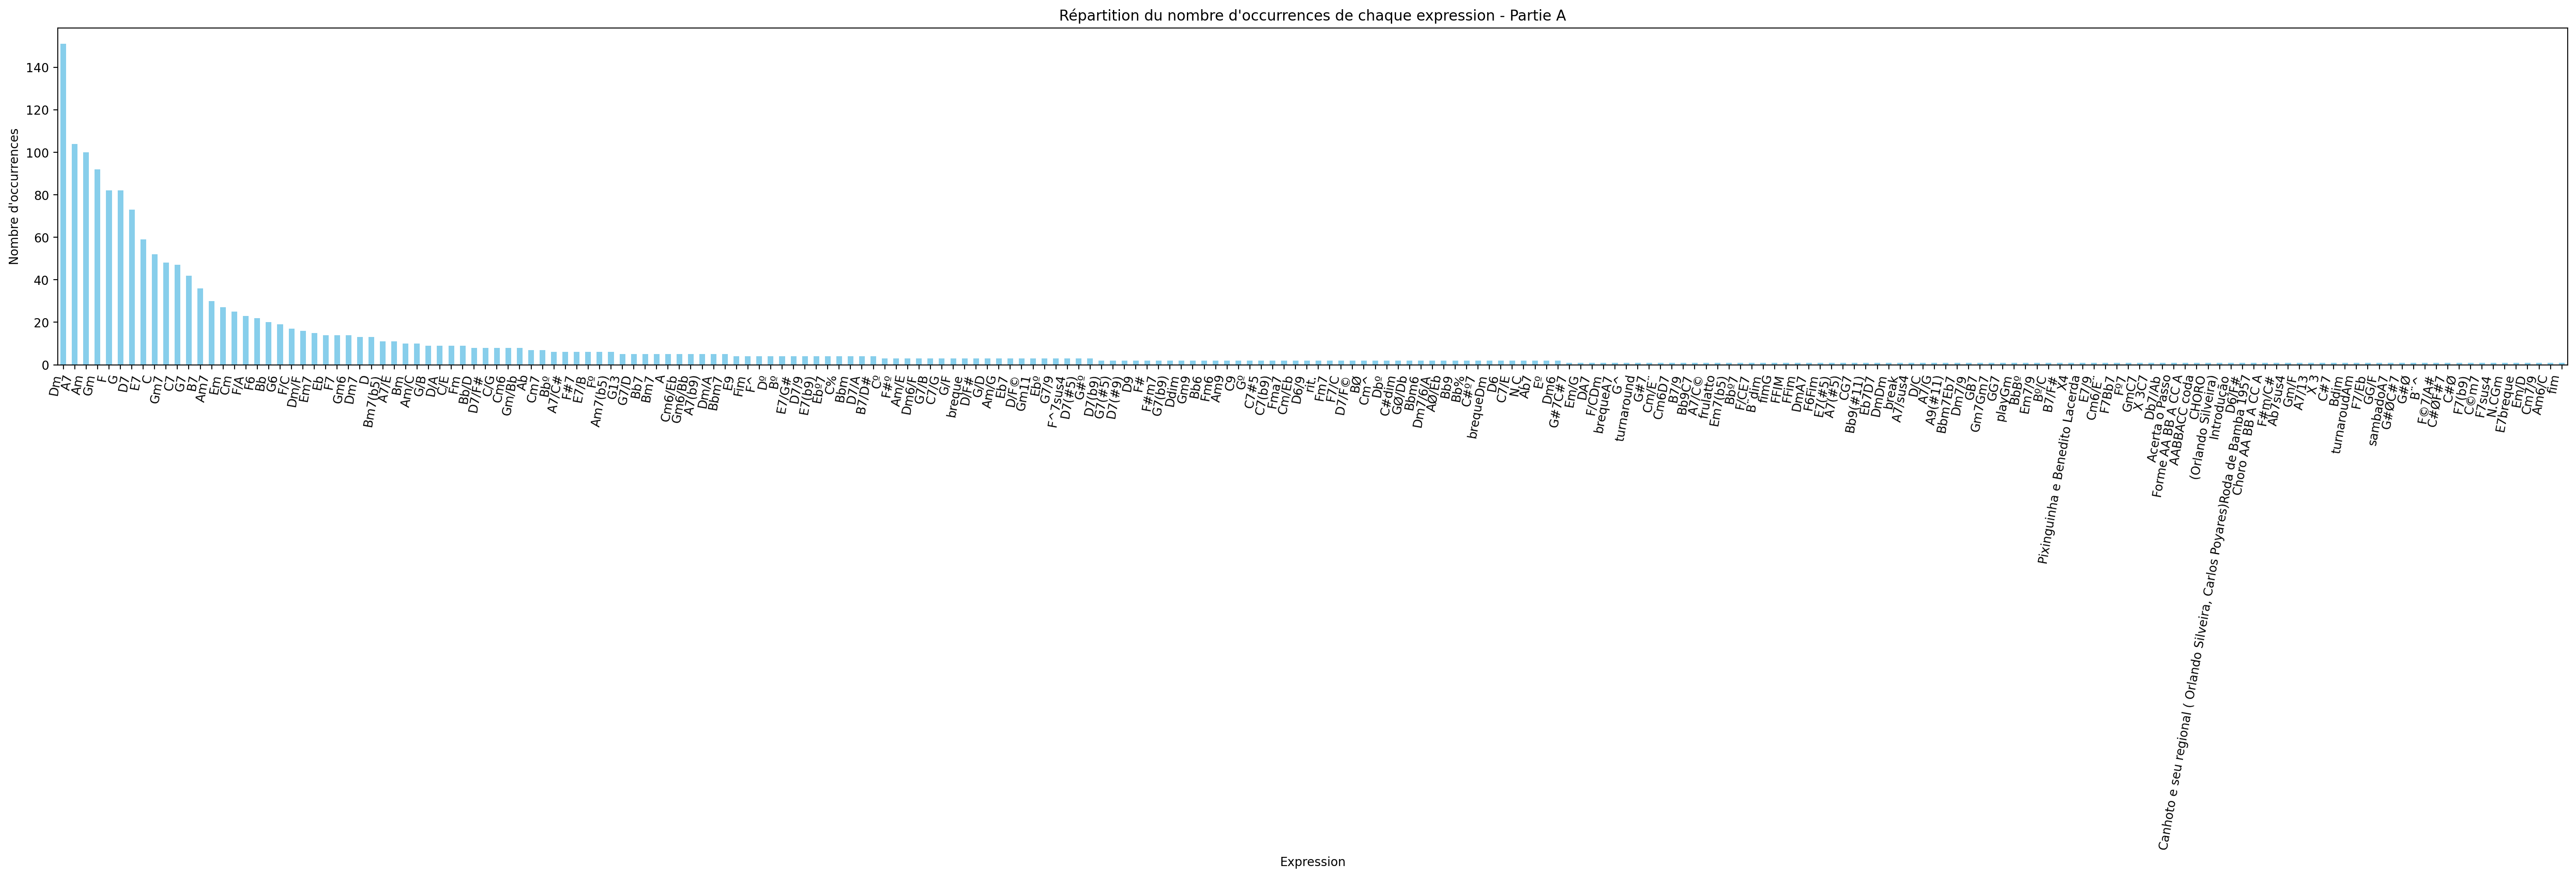

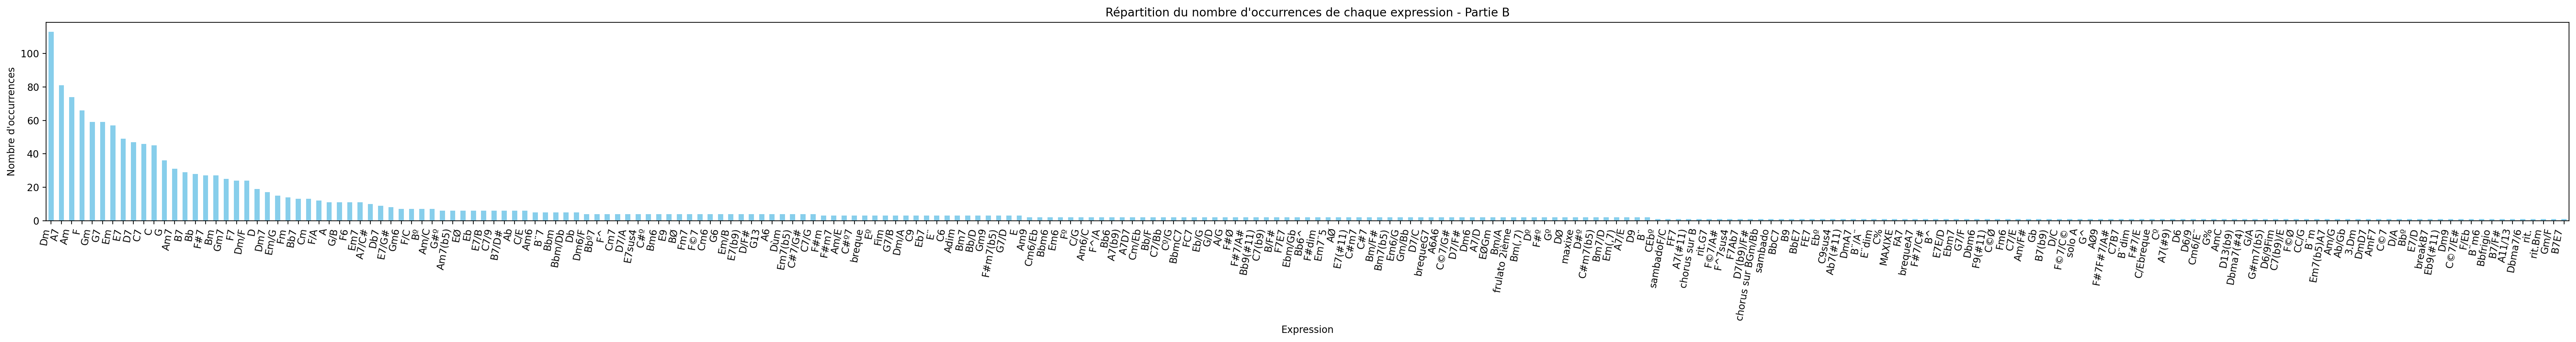

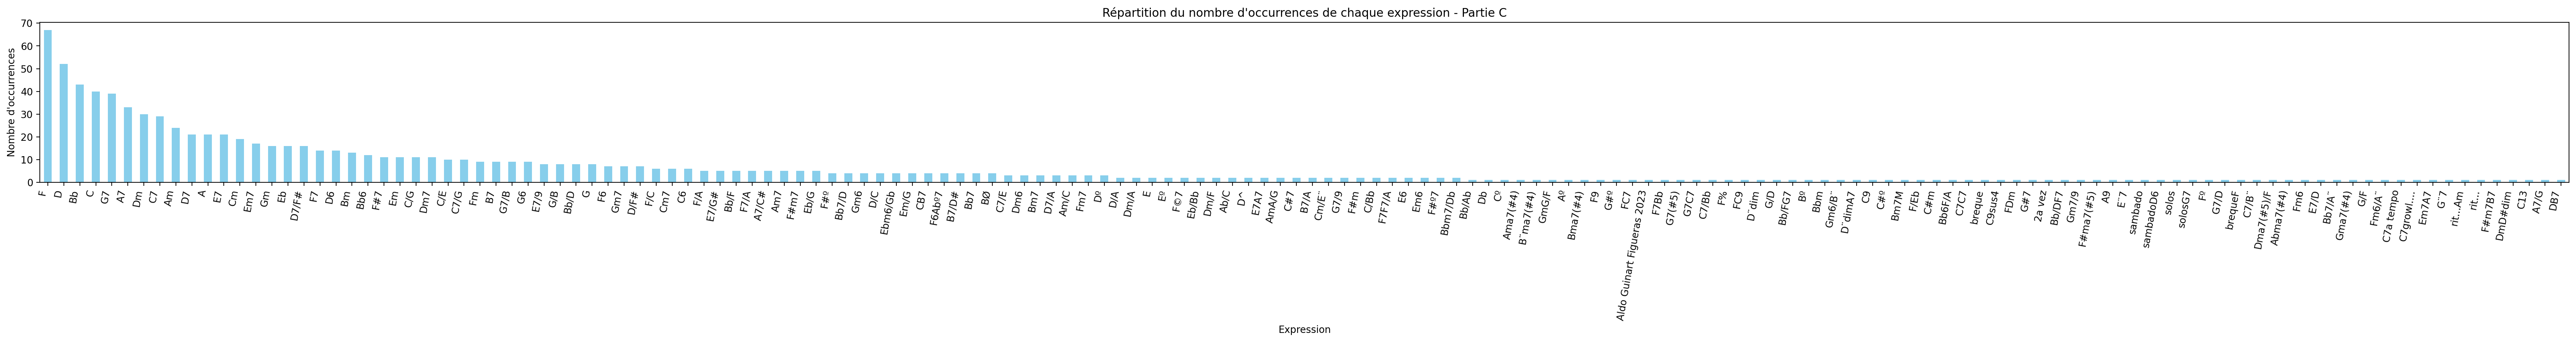

In [62]:
# Calcul du total d'expressions pour chaque partie
total_expressions = {}
for part in ['A', 'B', 'C']:
    total_expressions[part] = sum([exp_counts_sum[part][measure].sum() for measure in range(1, 37)])

# Calcul de la répartition du nombre d'occurrences de chaque expression pour chaque partie
expression_counts_global = {}
for part in ['A', 'B', 'C']:
    part_counts = [exp_counts_sum[part][measure] for measure in range(1, 37)]
    expression_counts_global[part] = pd.concat(part_counts, axis=1).sum(axis=1).sort_values(ascending=False)

# Affichage de la répartition du nombre d'occurrences de chaque expression pour chaque partie
for part in ['A', 'B', 'C']:
    plt.figure(figsize=(37, 5))
    expression_counts_global[part].plot(kind='bar', color='skyblue')
    plt.title(f'Répartition du nombre d\'occurrences de chaque expression - Partie {part}')
    plt.xlabel('Expression')
    plt.ylabel('Nombre d\'occurrences')
    plt.xticks(rotation=80, ha='right') 
    plt.tight_layout()
    plt.show()
